### 2024 A

##### Problem 1

In [ ]:
import numpy as np
import math 
from scipy.optimize import brentq

# =================================== const & input ===================================
t_globaler=395
max_theta=1000*math.pi

# =================================== functions ===================================
class length:
    def __init__(self):
        self.pi=np.pi
        self.k=0.55/(2*self.pi)
        self.r0=1.65
        self.r1=2.86
        self.totallength=self.length(32*self.pi,0)
    
    def getr(self,theta):
        return self.k*theta

    def length(self,up,down):
        lup=(self.k/2)*(up*math.sqrt(up**2+1)+math.log(up+math.sqrt(up**2+1)))
        ldown=(self.k/2)*(down*math.sqrt(down**2+1)+math.log(down+math.sqrt(down**2+1)))
        return lup-ldown
    
class equation(length):
    def __init__(self,t_global):
        self.pi=np.pi
        self.t=t_global
        super().__init__()

    def dragonhead(self,theta0):
        ls1=self.totallength-self.t
        rs1=self.length(theta0,0)
        return ls1-rs1

# =================================== output theta_0 ===================================
lengther= length()
equationer=equation(t_globaler)
print(equationer.dragonhead(0))
print(equationer.dragonhead(max_theta))

theta_0 = brentq(equationer.dragonhead, a=0, b=max_theta, xtol=1e-8)
print(f"theta[0] = {theta_0:.6f}")  
x_0=lengther.k*theta_0*math.cos(theta_0)
y_0=lengther.k*theta_0*math.sin(theta_0)
print(f"x[0] = {x_0:.6f}")
print(f"y[0] = {y_0:.6f}")
theta=[]
x=[]
y=[]
theta.append(theta_0)
x.append(x_0)
y.append(y_0)
v_0 = 1 / (lengther.k * math.sqrt(1+theta_0**2))
v=[]
v.append(v_0)

# ================================== output x,y[] ===================================
for i in range(1, 224):

    def recursive_equation(theta_next):
        ls2=(lengther.getr(theta[i-1]))**2+(lengther.getr(theta_next))**2-2*lengther.getr(theta[i-1])*lengther.getr(theta_next)*math.cos(theta[i-1]-theta_next)
        rs2=lengther.r0**2 if i!=1 else lengther.r1**2
        return ls2-rs2

    theta_next = brentq(recursive_equation, theta[i-1], max_theta, xtol=1e-8)
    theta.append(theta_next)
    x.append(lengther.getr(theta_next)*math.cos(theta_next))
    y.append(lengther.getr(theta_next)*math.sin(theta_next))

    vup = theta[i-1] - theta[i] * math.cos(theta[i] - theta[i-1]) - theta[i] * theta[i-1] * math.sin(theta[i] - theta[i-1])
    vdown = theta[i-1] * math.cos(theta[i] - theta[i-1]) - theta[i] - theta[i] * theta[i-1] * math.sin(theta[i] - theta[i-1])
    v.append((vup / vdown) * v[i-1])

for i in range(0,224):
    v[i]=v[i]*math.sqrt(1+theta[i]**2)*lengther.k

print(f"x[1] = {x[1]:.6f}")
print(f"y[1] = {y[1]:.6f}")
print(f"x[51] = {x[51]:.6f}")
print(f"y[51] = {y[51]:.6f}")
print(f"x[101] = {x[101]:.6f}")
print(f"y[101] = {y[101]:.6f}")
print(f"x[151] = {x[151]:.6f}")
print(f"y[151] = {y[151]:.6f}")
print(f"x[201] = {x[201]:.6f}")
print(f"y[201] = {y[201]:.6f}")
print(f"x[223] = {x[223]:.6f}")
print(f"y[223] = {y[223]:.6f}")
print(f"v[0] = {v[0]:.6f}")
print(f"v[1] = {v[1]:.6f}")
print(f"v[51] = {v[51]:.6f}")
print(f"v[101] = {v[101]:.6f}")
print(f"v[151] = {v[151]:.6f}")
print(f"v[201] = {v[201]:.6f}")
print(f"v[223] = {v[223]:.6f}")

# ================================== write csv ===================================
import csv
with open("C:\\Users\\32231\\Desktop\\GJSB\\MATLAB\\P1.csv", 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    for i in range(len(x)):
        writer.writerow([f'x[{i}]', f'{x[i]:.6f}'])
        writer.writerow([f'y[{i}]', f'{y[i]:.6f}'])

# print("数据已成功写入dragon_curve_coordinates.csv文件")




#### Problem 2

##### 可视化搜索

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


csv_path = "C:\\Users\\32231\\Desktop\\GJSB\\MATLAB\\P1.csv"  

x_coords = []
y_coords = []

with open(csv_path, 'r', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for idx, row in enumerate(reader):
        value = float(row[1])
        if idx % 2 == 0:
            x_coords.append(value)
        else:
            y_coords.append(value)

num_points = len(x_coords)

plt.figure(figsize=(6, 5))
ax = plt.gca()
ax.set_aspect('equal') 
ax.axis('off')
ax.plot(x_coords, y_coords, 'ro', markersize=5)


vertical_distance = 0.15  
extend_length = 0.275     


for i in range(num_points - 1):
    
    xA, yA = x_coords[i], y_coords[i]
    xB, yB = x_coords[i+1], y_coords[i+1]
    
    dx = xB - xA
    dy = yB - yA
    segment_length = np.sqrt(dx**2 + dy**2)
    ux = dx / segment_length  
    uy = dy / segment_length  
    xA_extend = xA - ux * extend_length
    yA_extend = yA - uy * extend_length
    xB_extend = xB + ux * extend_length
    yB_extend = yB + uy * extend_length
    
    ax.plot([xA_extend, xB_extend], [yA_extend, yB_extend], 'm--', linewidth=1)
    
    vx1, vy1 = -uy, ux   
    vx2, vy2 = uy, -ux   
    p1 = (xA_extend + vertical_distance * vx1, yA_extend + vertical_distance * vy1)
    p2 = (xB_extend + vertical_distance * vx1, yB_extend + vertical_distance * vy1)
    p3 = (xB_extend + vertical_distance * vx2, yB_extend + vertical_distance * vy2)
    p4 = (xA_extend + vertical_distance * vx2, yA_extend + vertical_distance * vy2)
    
    rectangle = Polygon([p1, p2, p3, p4], 
                       edgecolor='green', 
                       facecolor='green', 
                       linewidth=1, 
                       alpha=0.3)
    ax.add_patch(rectangle)

plt.tight_layout(pad=0)
plt.show()


##### 粗略搜索和中精度排除

412.47381
theta[0] = 26.146547
x[0] = 1.209908
y[0] = 1.942800
26.14654684524352
t=412.473810 时的最小距离: 0.0000007288


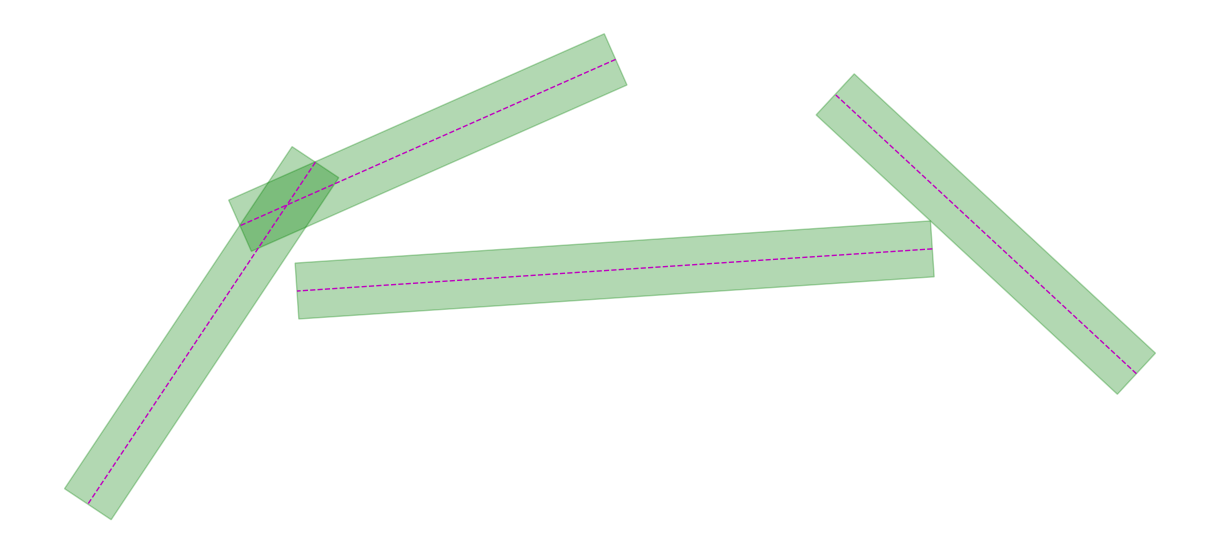

412.473811
theta[0] = 26.146546
x[0] = 1.209909
y[0] = 1.942799
26.146546408641797
t=412.473811 时的最小距离: 0.0000007025


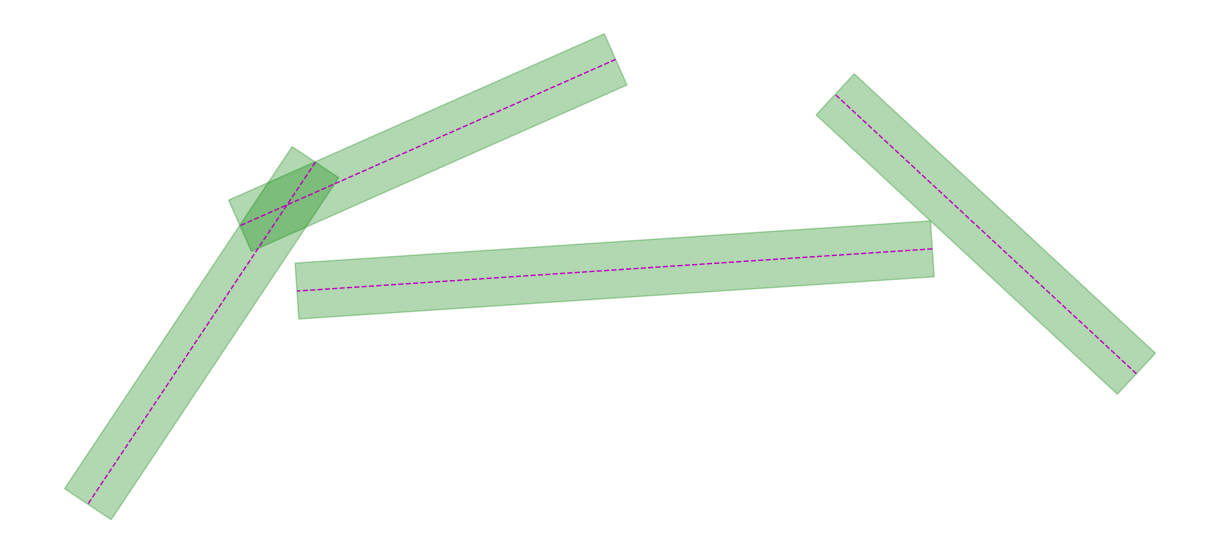

412.473812
theta[0] = 26.146546
x[0] = 1.209910
y[0] = 1.942798
26.146545972040077
t=412.473812 时的最小距离: 0.0000006762


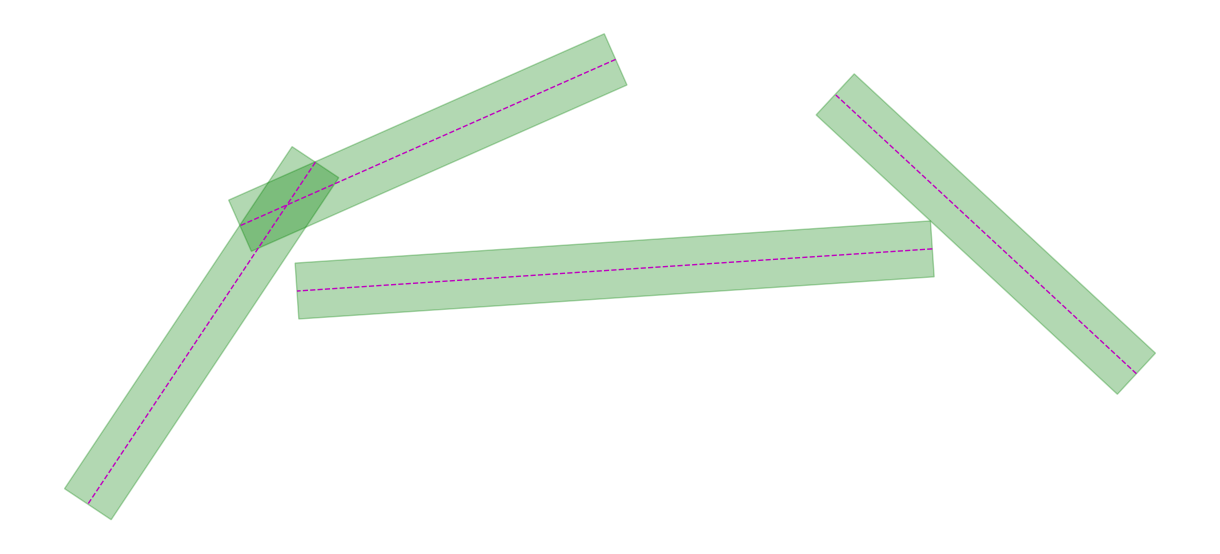

412.473813
theta[0] = 26.146546
x[0] = 1.209911
y[0] = 1.942798
26.146545535438342
t=412.473813 时的最小距离: 0.0000006499


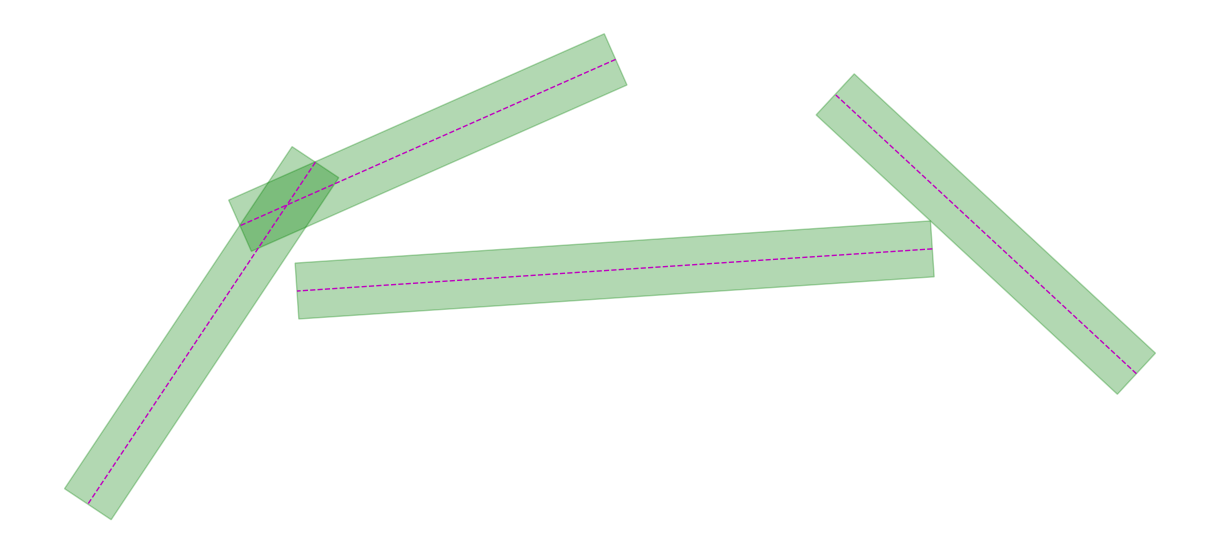

412.473814
theta[0] = 26.146545
x[0] = 1.209911
y[0] = 1.942797
26.1465450988366
t=412.473814 时的最小距离: 0.0000006235


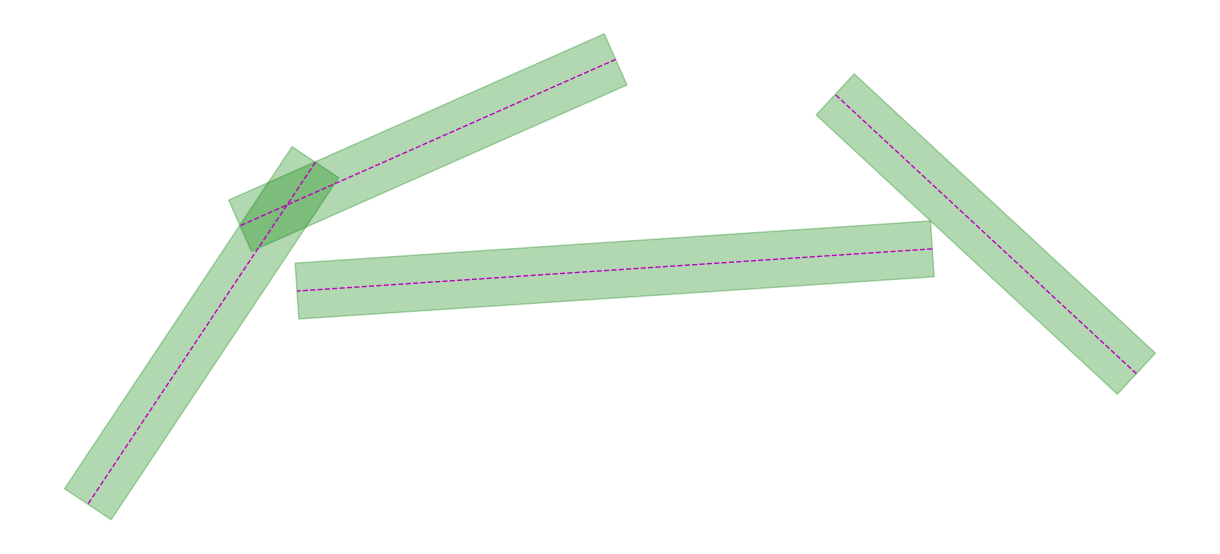

412.473815
theta[0] = 26.146545
x[0] = 1.209912
y[0] = 1.942797
26.146544662234856
t=412.473815 时的最小距离: 0.0000005972


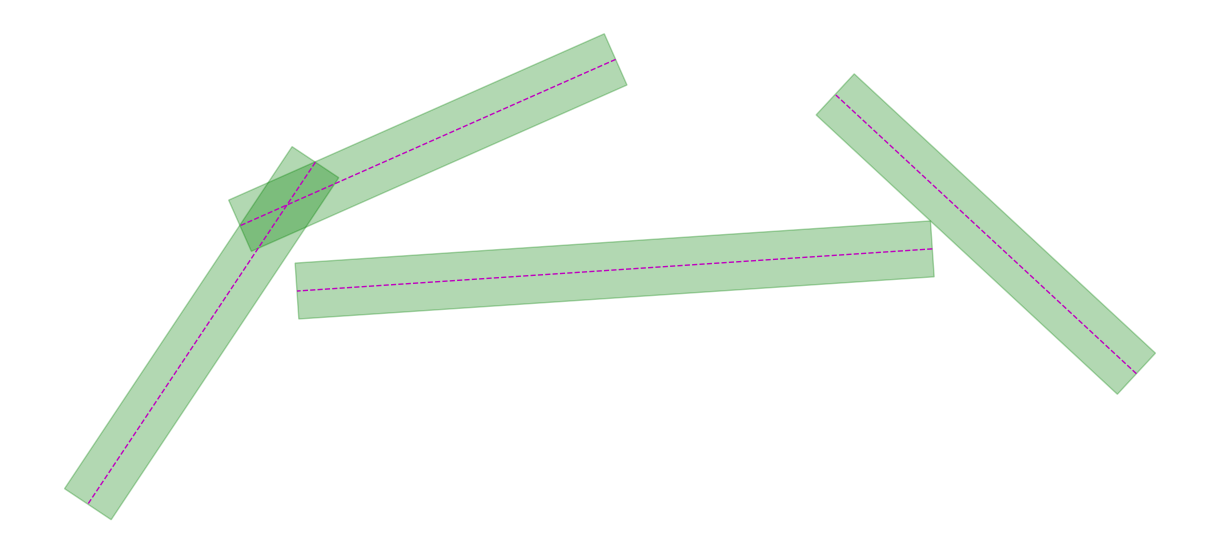

412.473816
theta[0] = 26.146544
x[0] = 1.209913
y[0] = 1.942796
26.1465442256331
t=412.473816 时的最小距离: 0.0000005709


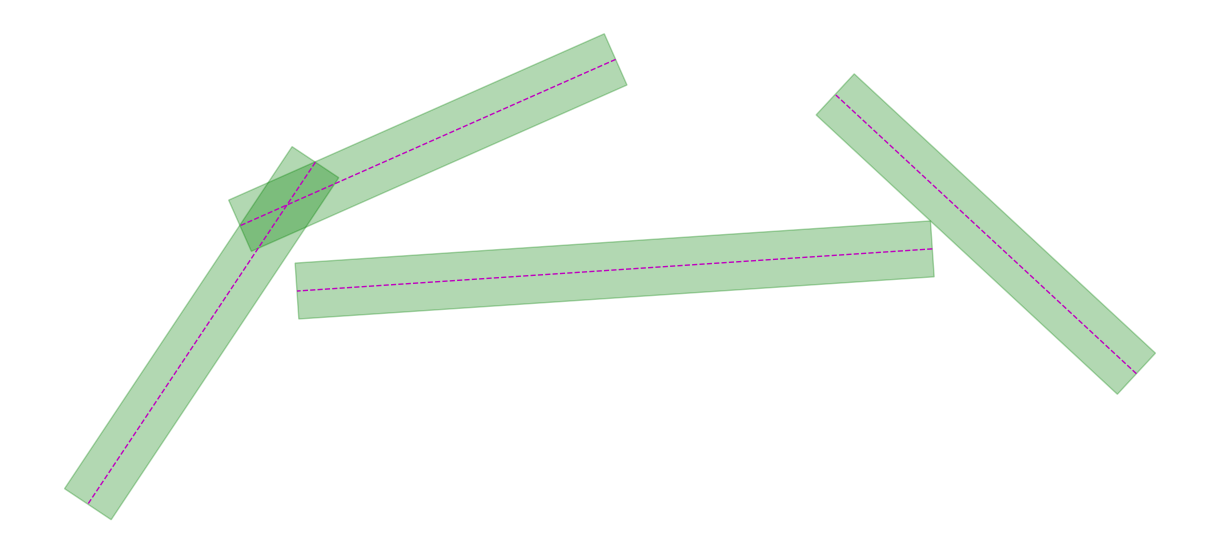

412.473817
theta[0] = 26.146544
x[0] = 1.209914
y[0] = 1.942796
26.146543789031337
t=412.473817 时的最小距离: 0.0000005446


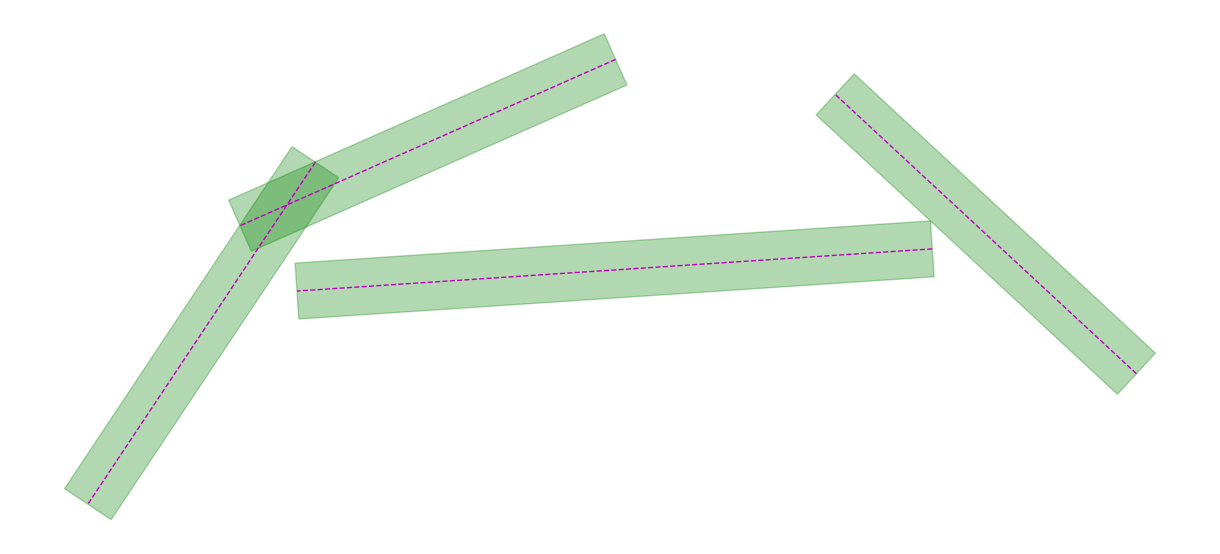

412.473818
theta[0] = 26.146543
x[0] = 1.209915
y[0] = 1.942795
26.146543352429568
t=412.473818 时的最小距离: 0.0000005183


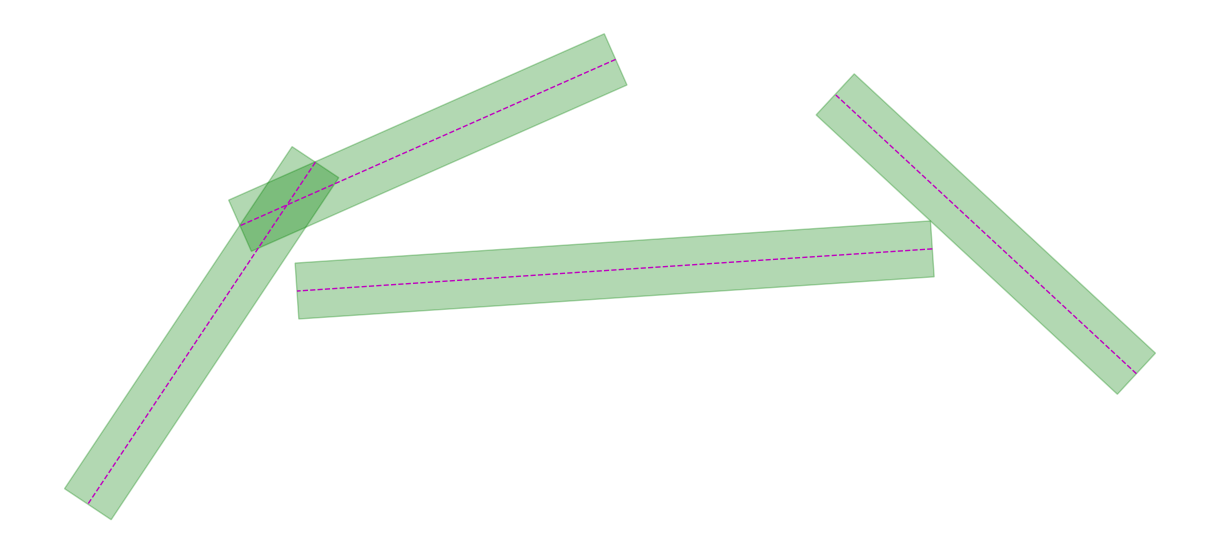

412.473819
theta[0] = 26.146543
x[0] = 1.209916
y[0] = 1.942795
26.14654291582779
t=412.473819 时的最小距离: 0.0000004919


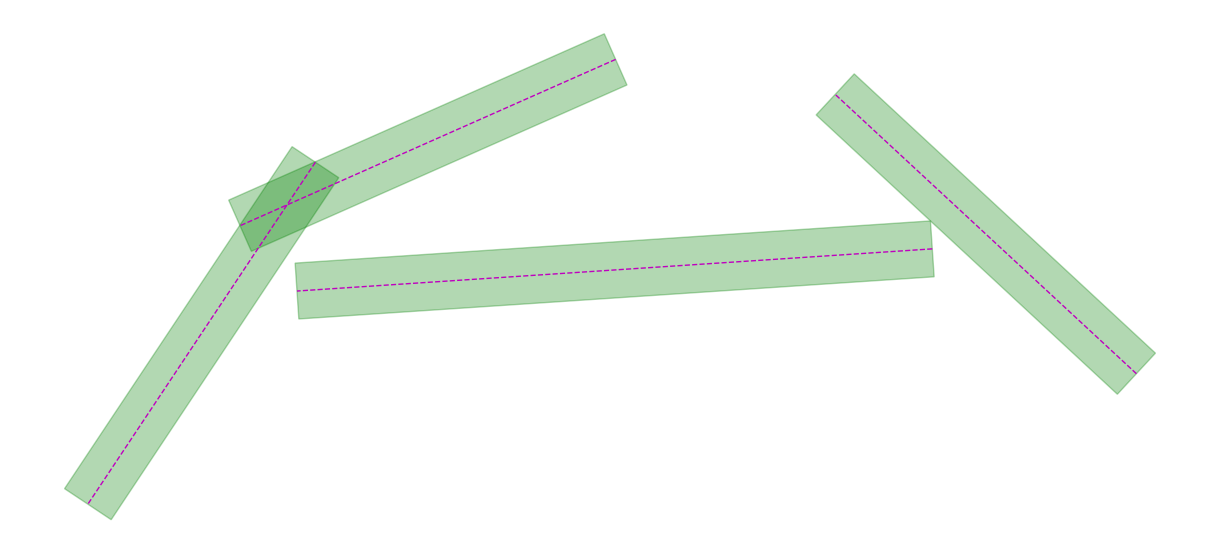

412.47382
theta[0] = 26.146542
x[0] = 1.209916
y[0] = 1.942794
26.14654247922601
t=412.473820 时的最小距离: 0.0000004656


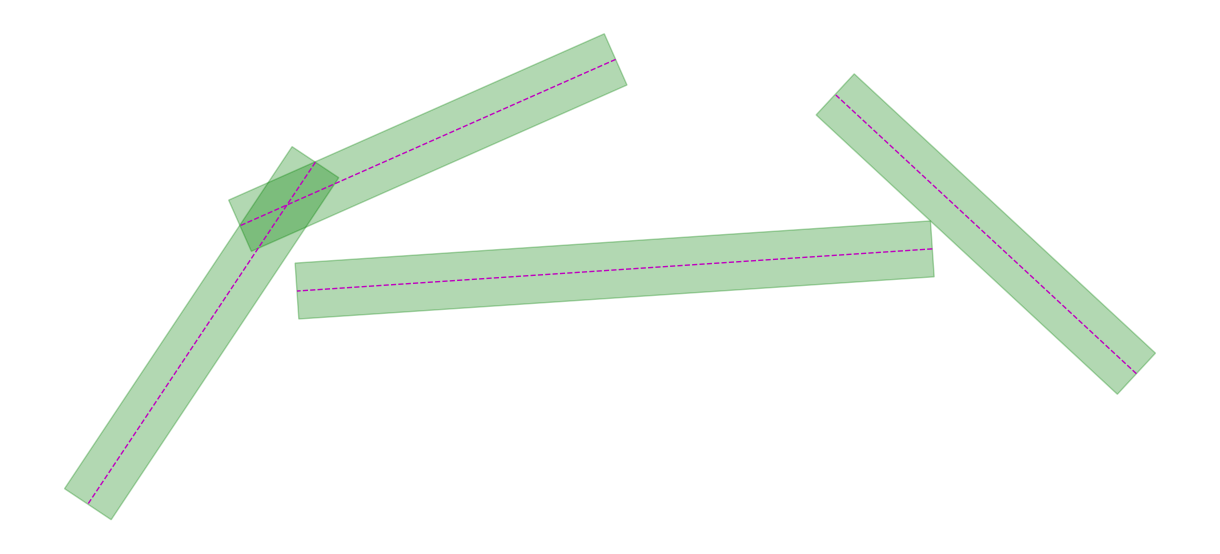

412.473821
theta[0] = 26.146542
x[0] = 1.209917
y[0] = 1.942793
26.146542042624215
t=412.473821 时的最小距离: 0.0000004393


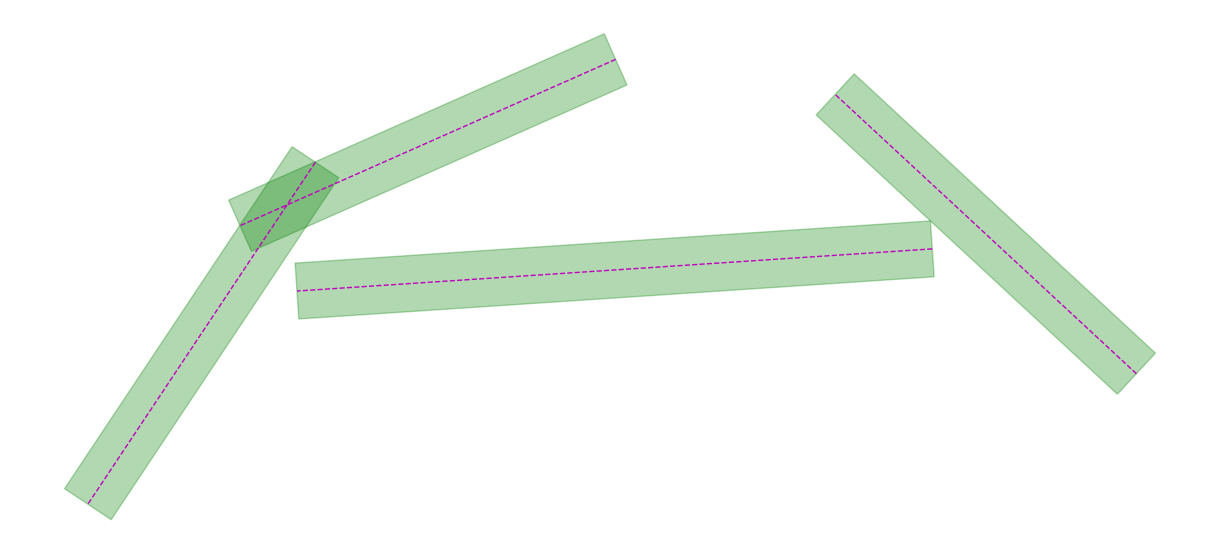

412.473822
theta[0] = 26.146542
x[0] = 1.209918
y[0] = 1.942793
26.14654160602242
t=412.473822 时的最小距离: 0.0000004130


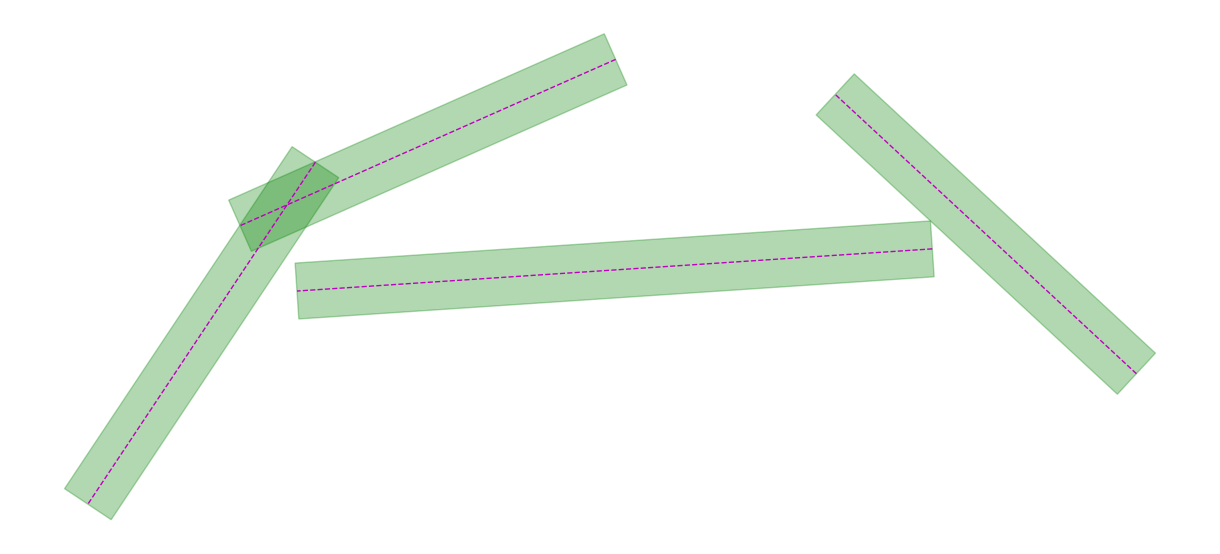

412.473823
theta[0] = 26.146541
x[0] = 1.209919
y[0] = 1.942792
26.146541169420615
t=412.473823 时的最小距离: 0.0000003867


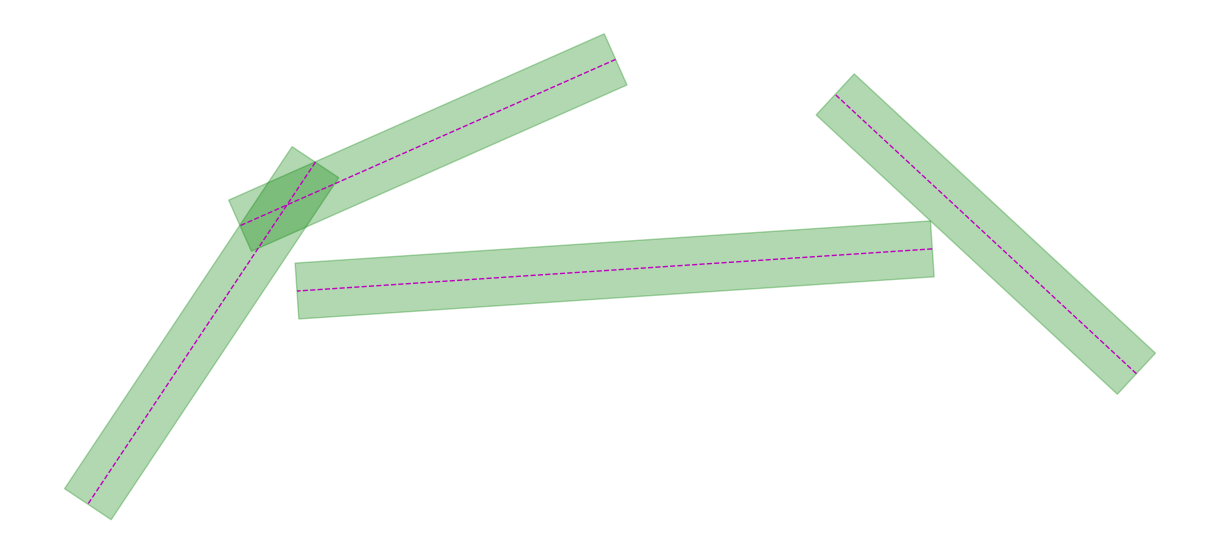

412.473824
theta[0] = 26.146541
x[0] = 1.209920
y[0] = 1.942792
26.1465407328188
t=412.473824 时的最小距离: 0.0000003603


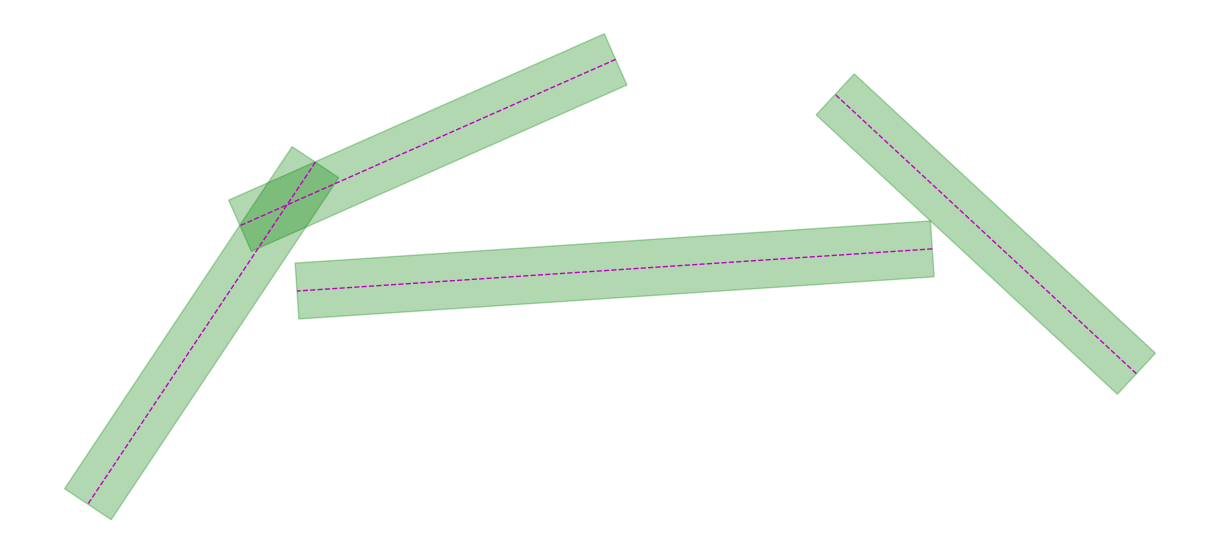

412.473825
theta[0] = 26.146540
x[0] = 1.209921
y[0] = 1.942791
26.14654029621698
t=412.473825 时的最小距离: 0.0000003340


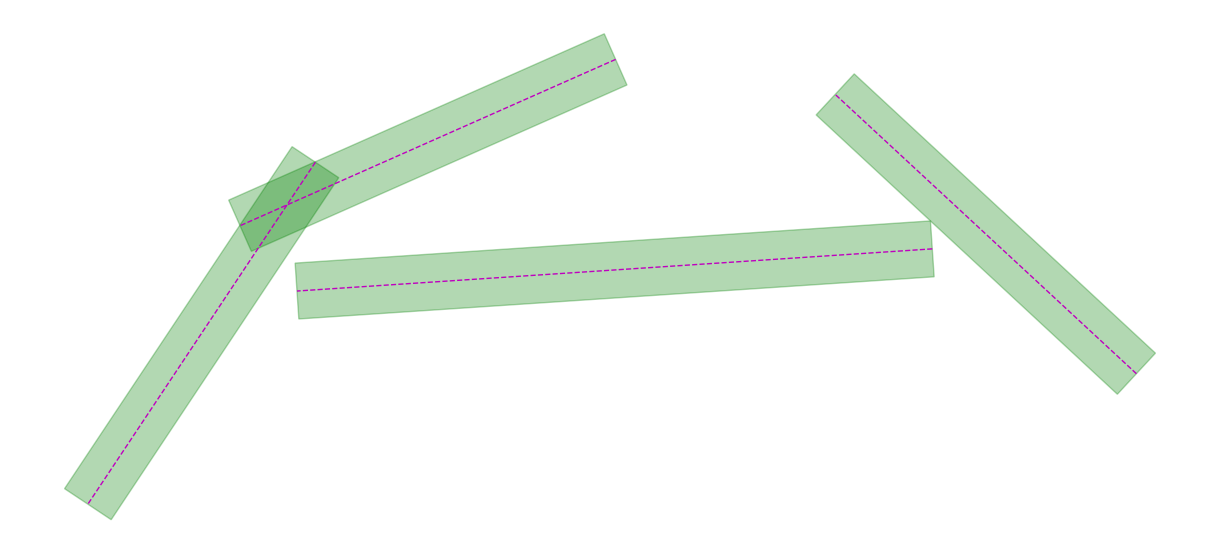

412.473826
theta[0] = 26.146540
x[0] = 1.209921
y[0] = 1.942791
26.146539859615153
t=412.473826 时的最小距离: 0.0000003077


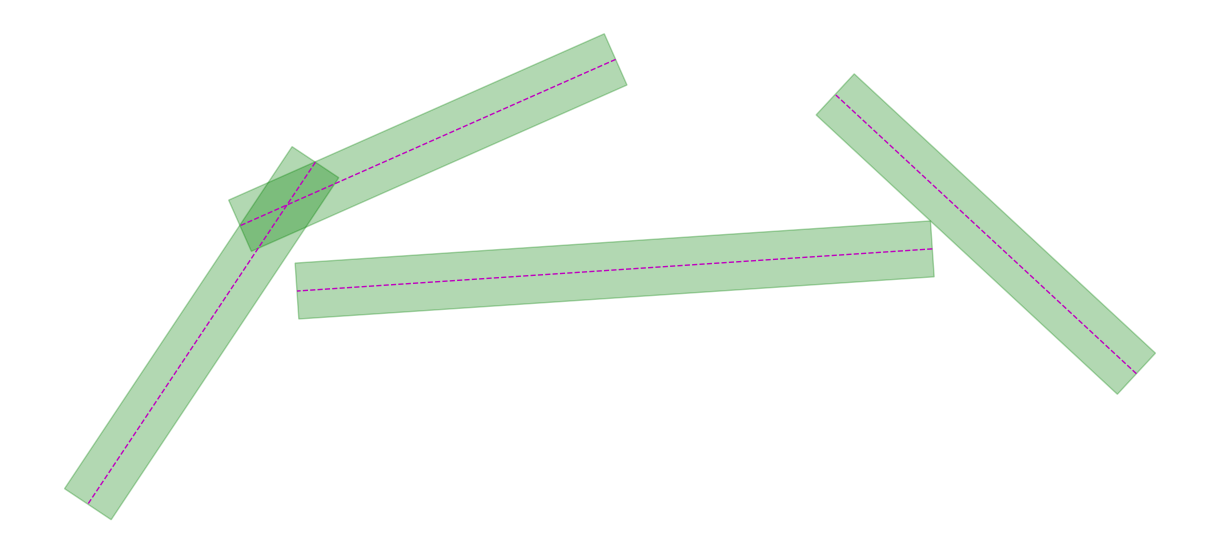

412.47382699999997
theta[0] = 26.146539
x[0] = 1.209922
y[0] = 1.942790
26.14653942301332
t=412.473827 时的最小距离: 0.0000002814


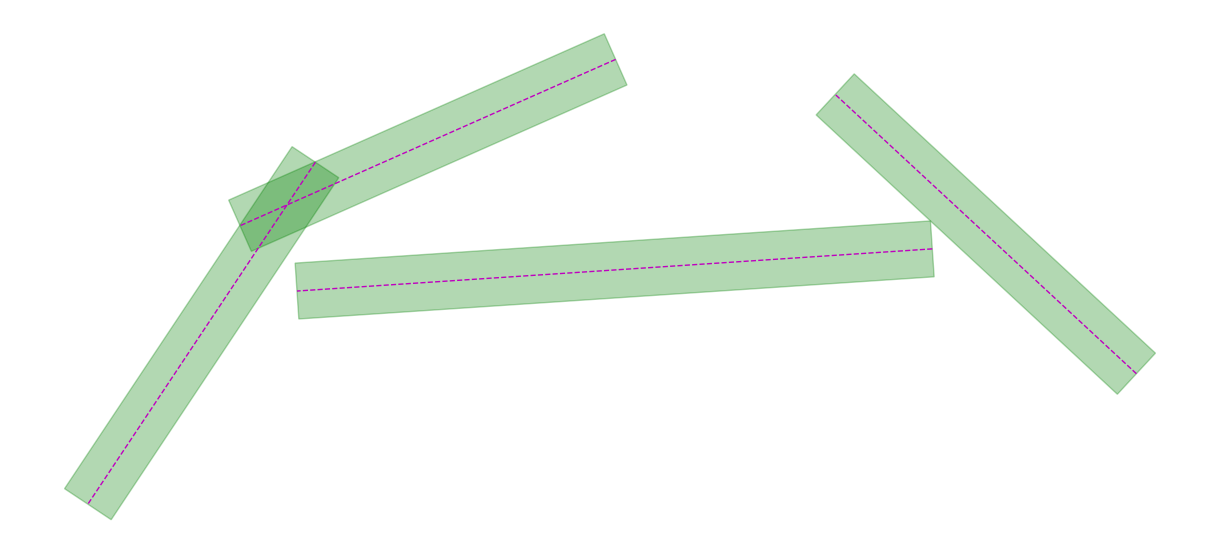

412.47382799999997
theta[0] = 26.146539
x[0] = 1.209923
y[0] = 1.942789
26.146538986411475
t=412.473828 时的最小距离: 0.0000002550


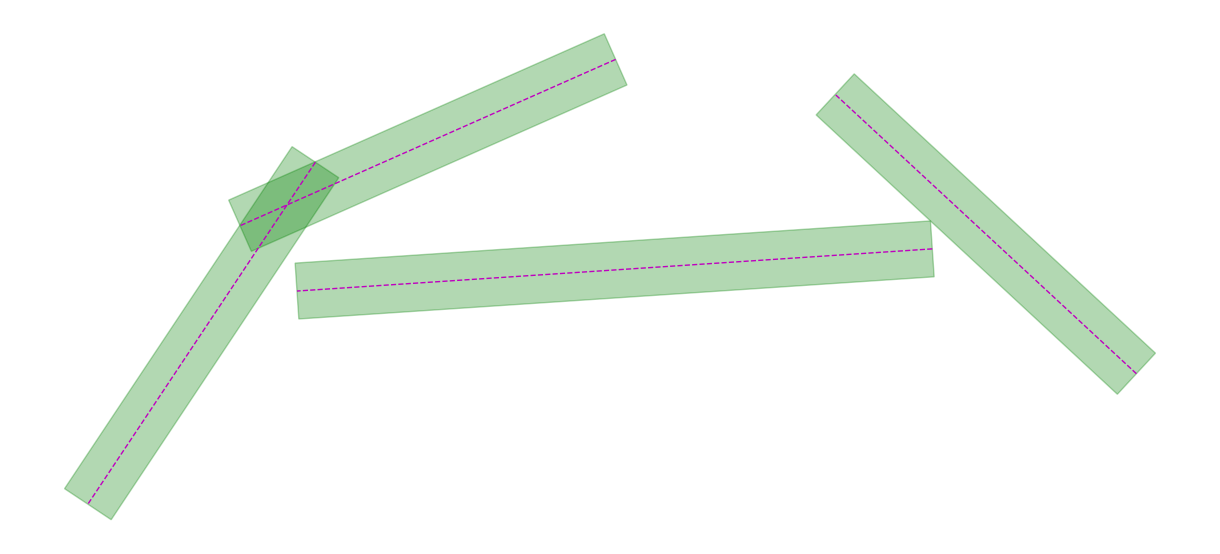

412.47382899999997
theta[0] = 26.146539
x[0] = 1.209924
y[0] = 1.942789
26.146538549809627
t=412.473829 时的最小距离: 0.0000002287


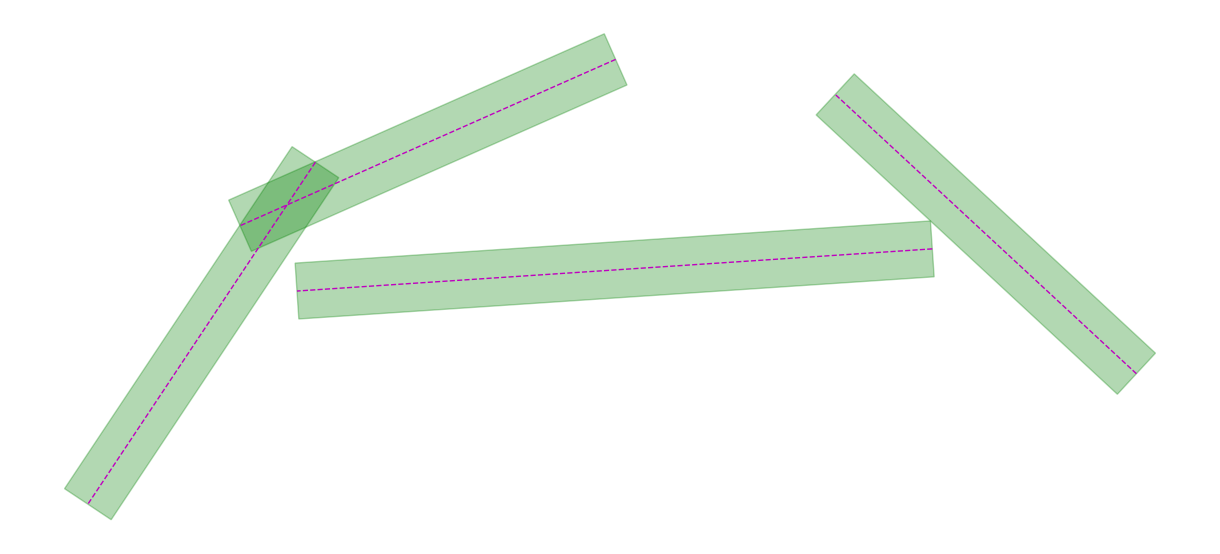

412.47382999999996
theta[0] = 26.146538
x[0] = 1.209925
y[0] = 1.942788
26.146538113207768
t=412.473830 时的最小距离: 0.0000002024


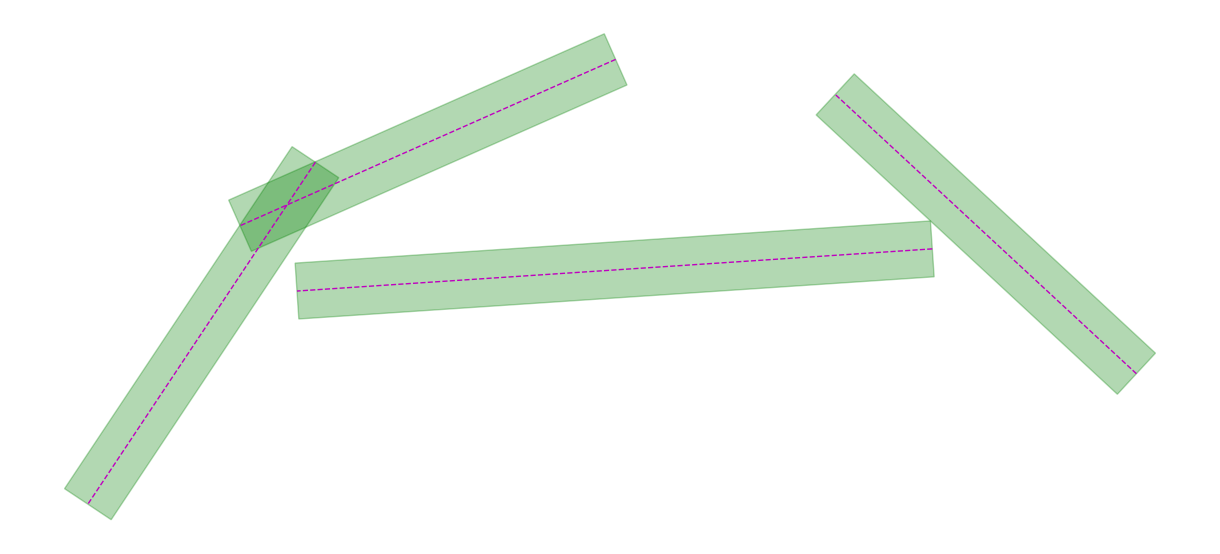

412.47383099999996
theta[0] = 26.146538
x[0] = 1.209925
y[0] = 1.942788
26.146537676605906
t=412.473831 时的最小距离: 0.0000001761


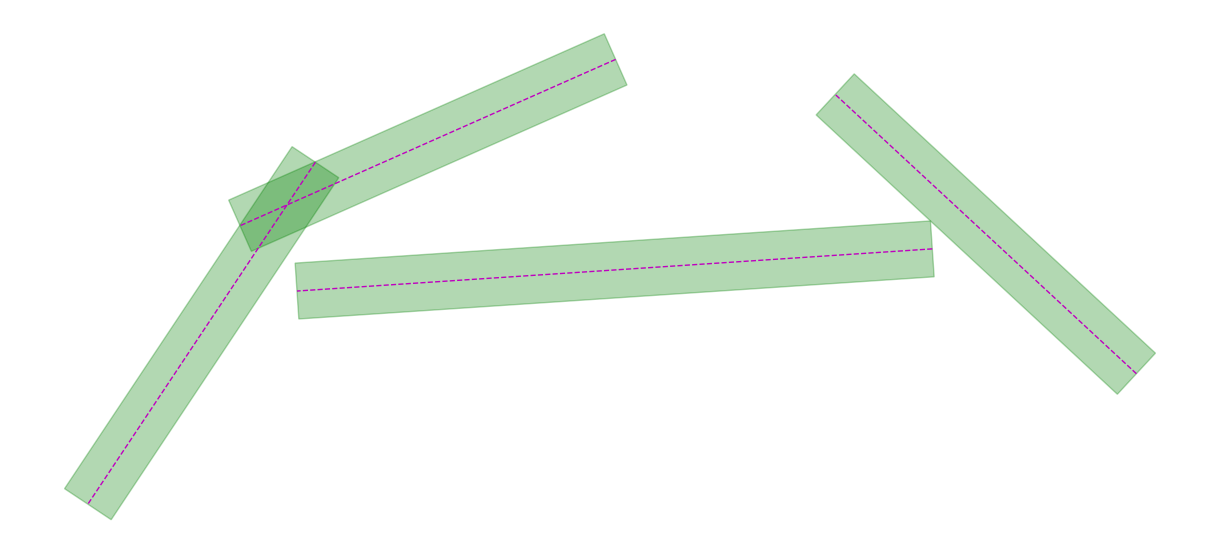

412.47383199999996
theta[0] = 26.146537
x[0] = 1.209926
y[0] = 1.942787
26.146537240004037
t=412.473832 时的最小距离: 0.0000001498


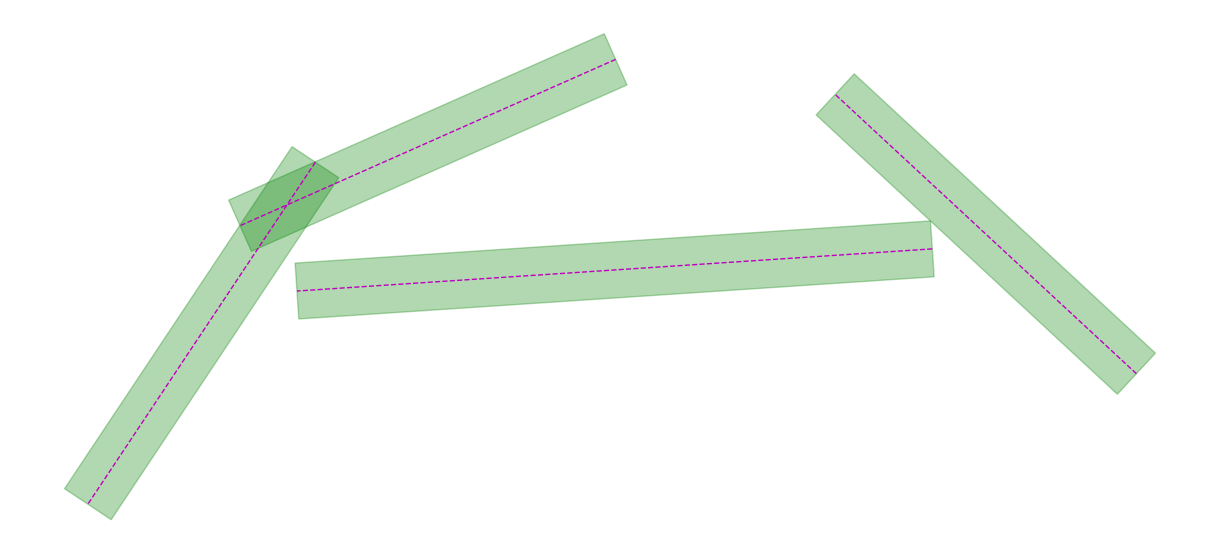

412.47383299999996
theta[0] = 26.146537
x[0] = 1.209927
y[0] = 1.942787
26.14653680340216
t=412.473833 时的最小距离: 0.0000001234


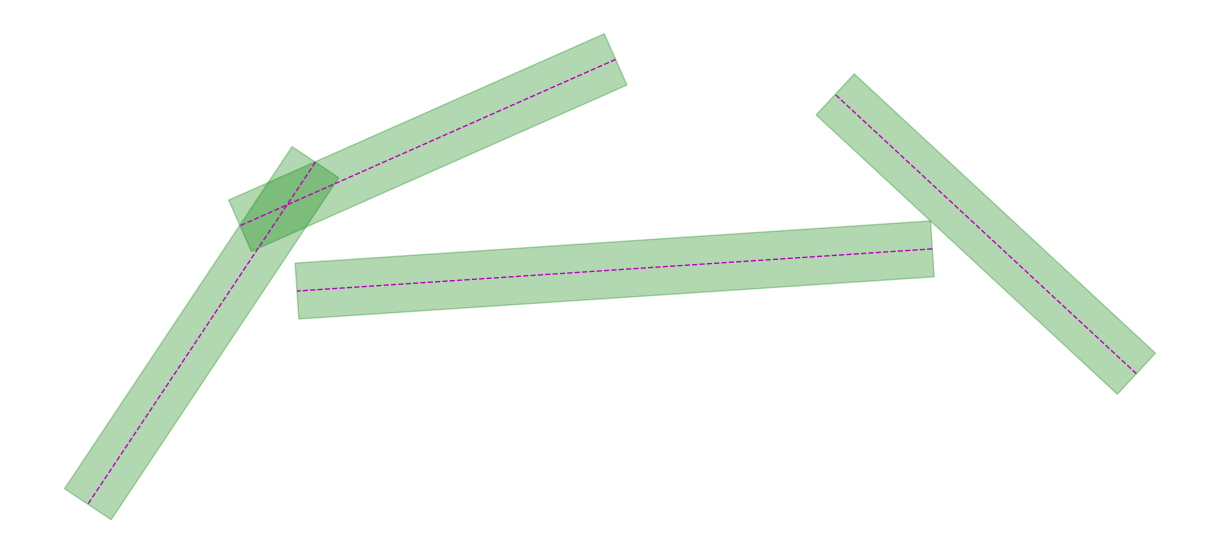

412.47383399999995
theta[0] = 26.146536
x[0] = 1.209928
y[0] = 1.942786
26.14653636680027
t=412.473834 时的最小距离: 0.0000000971


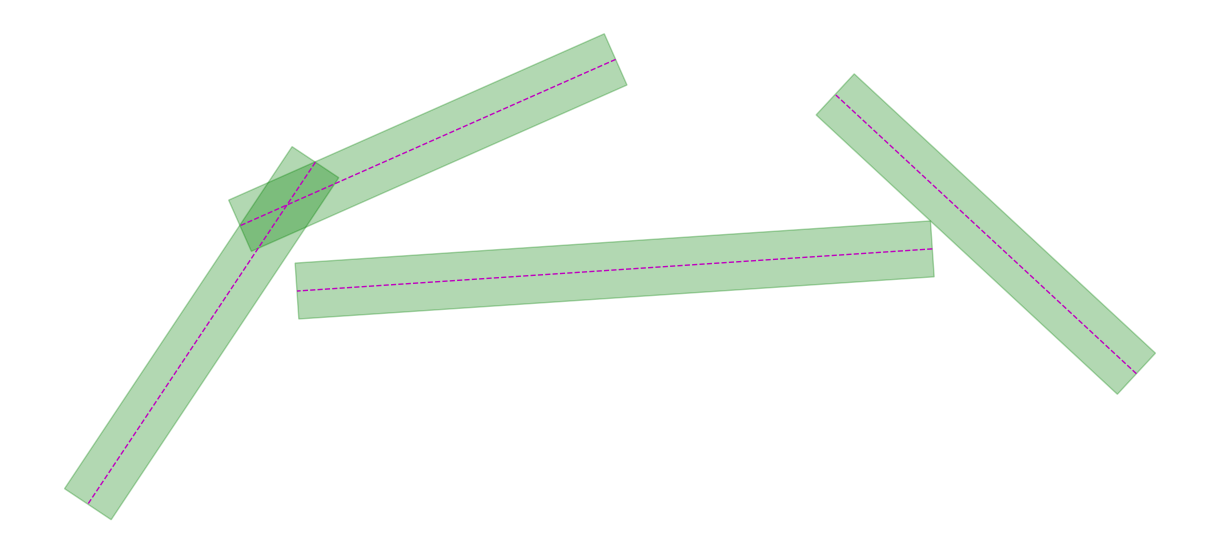

412.47383499999995
theta[0] = 26.146536
x[0] = 1.209929
y[0] = 1.942786
26.14653593019838
t=412.473835 时的最小距离: 0.0000000708


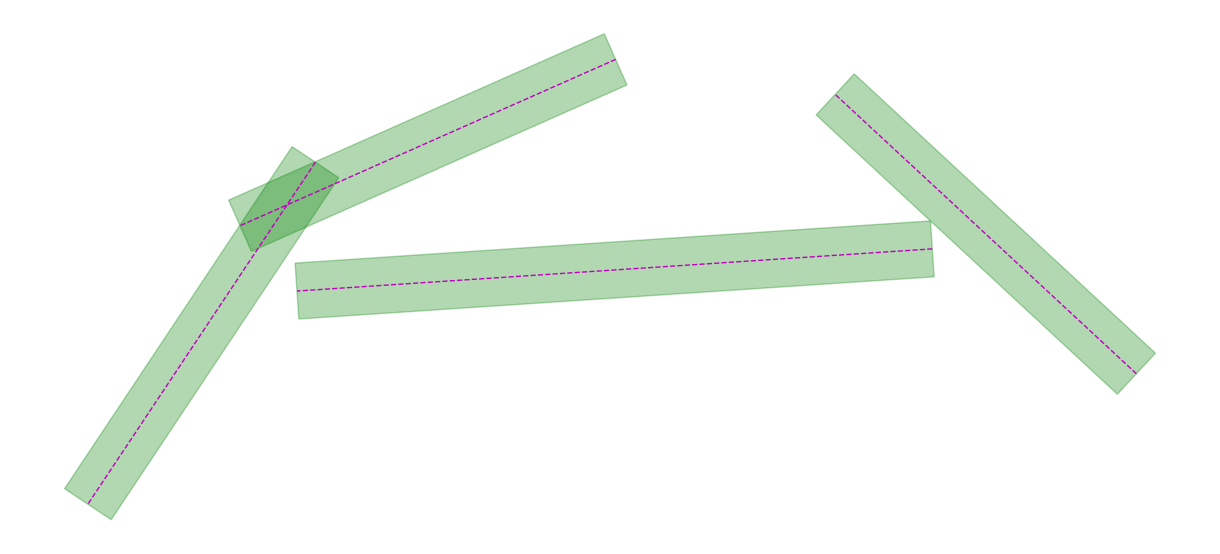

412.47383599999995
theta[0] = 26.146535
x[0] = 1.209930
y[0] = 1.942785
26.146535493596478
t=412.473836 时的最小距离: 0.0000000445


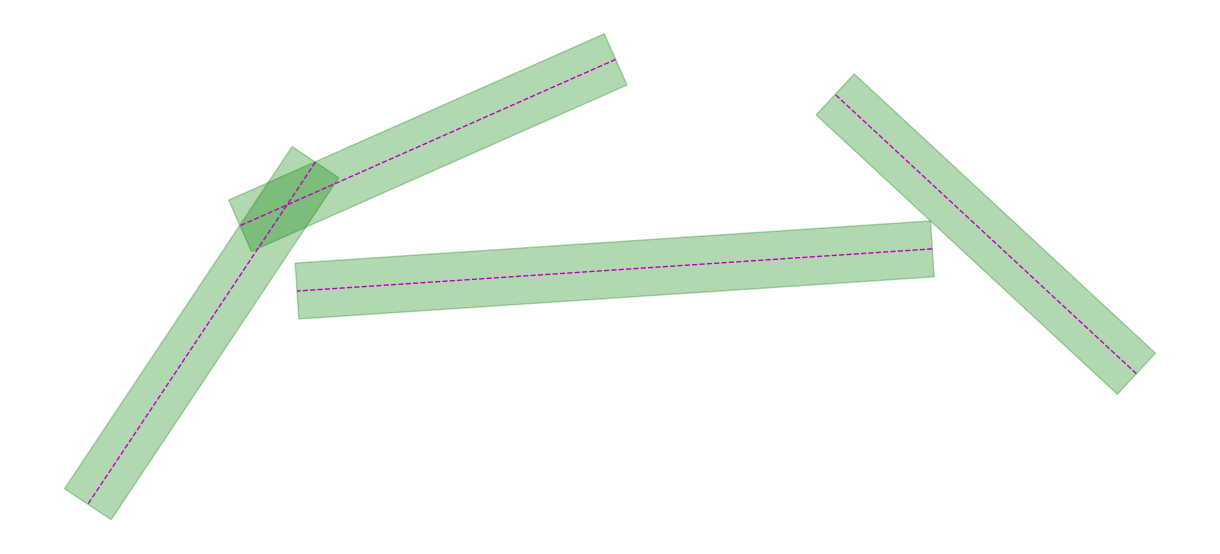

412.47383699999995
theta[0] = 26.146535
x[0] = 1.209930
y[0] = 1.942784
26.146535056994573
t=412.473837 时的最小距离: 0.0000000182


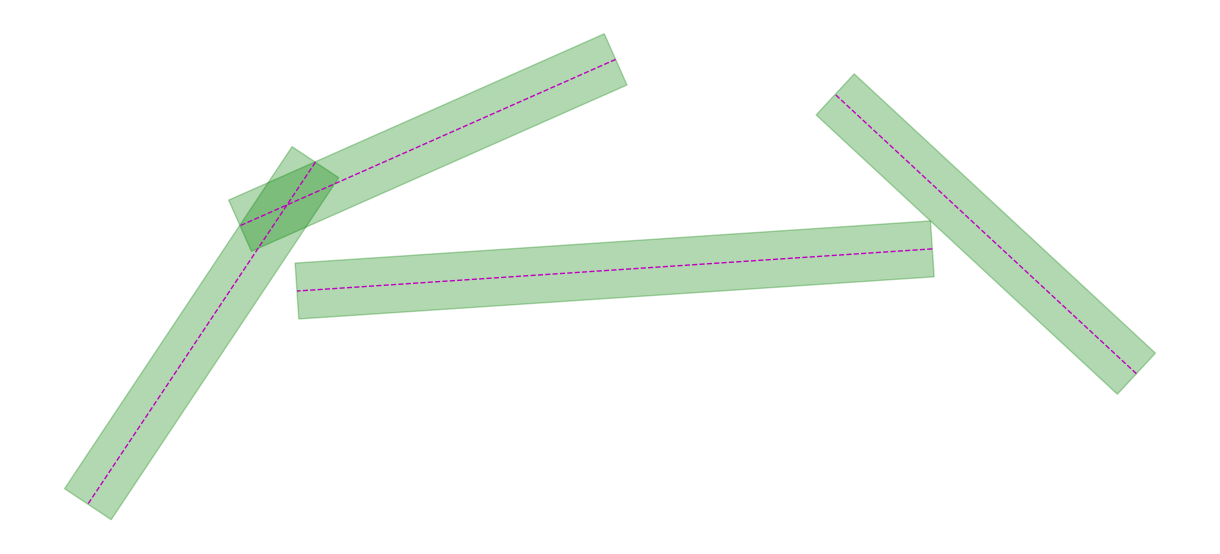

412.47383799999994
theta[0] = 26.146535
x[0] = 1.209931
y[0] = 1.942784
26.146534620392657
t=412.473838 时的最小距离: 0.0000000082


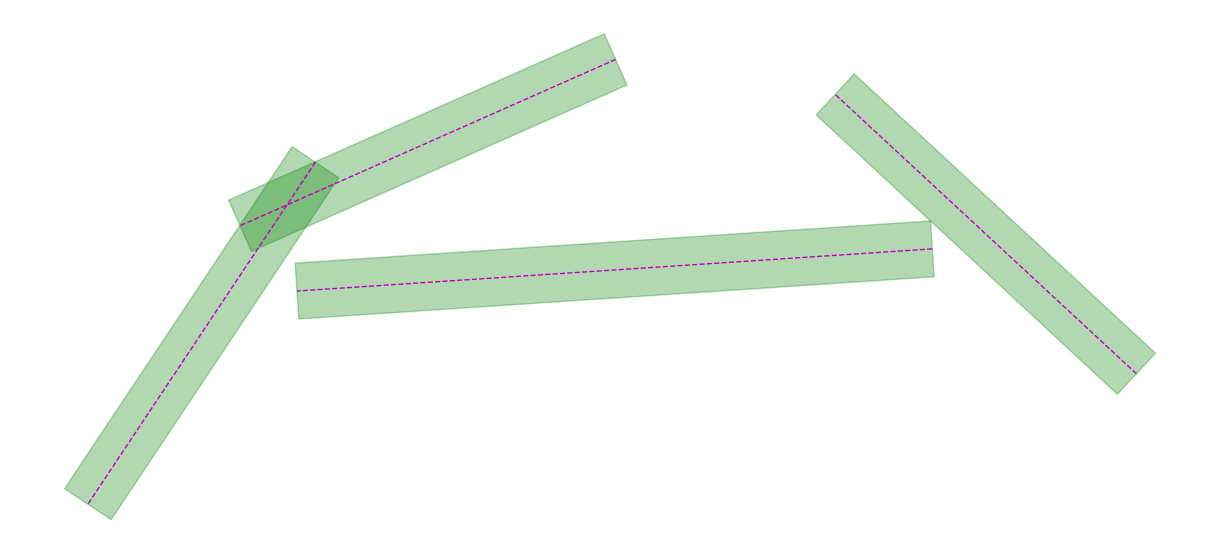

412.47383899999994
theta[0] = 26.146534
x[0] = 1.209932
y[0] = 1.942783
26.14653418379073
t=412.473839 时的最小距离: 0.0000000345


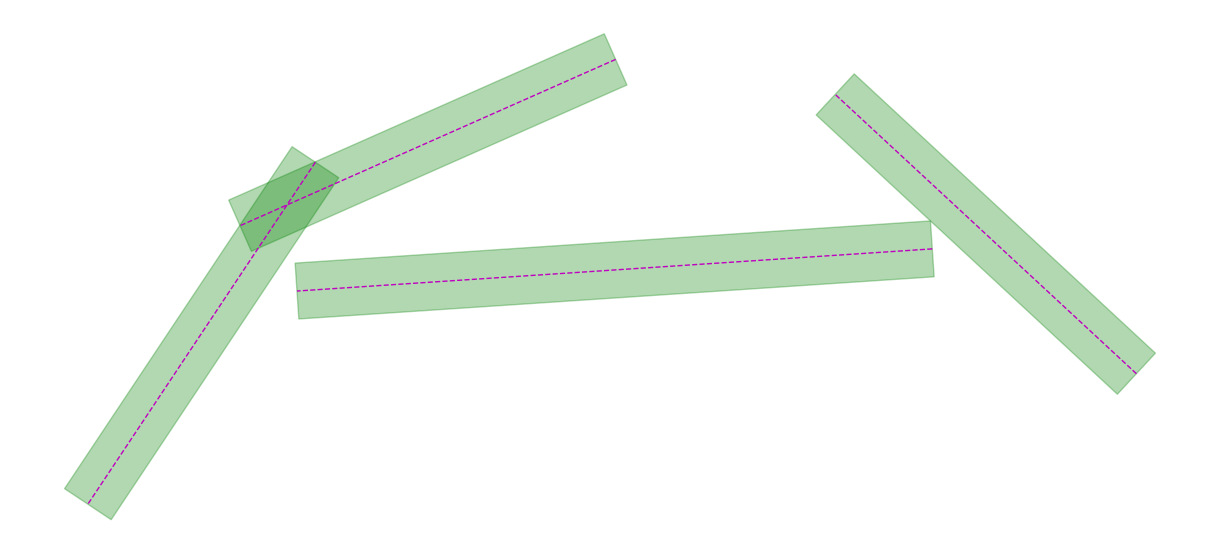

412.47383999999994
theta[0] = 26.146534
x[0] = 1.209933
y[0] = 1.942783
26.146533747188805
t=412.473840 时的最小距离: 0.0000000608


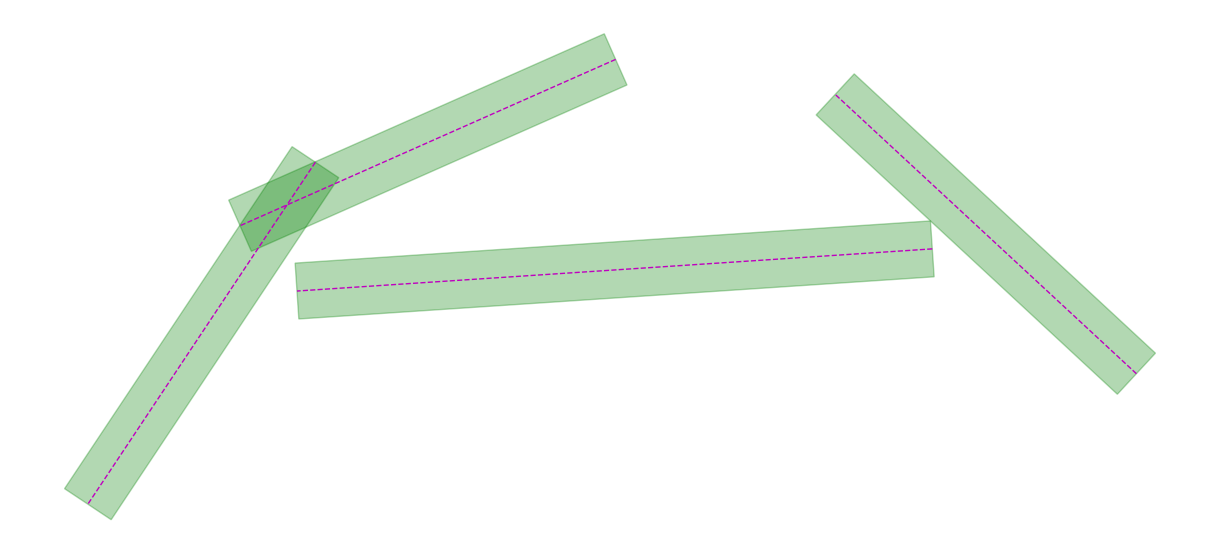

412.47384099999994
theta[0] = 26.146533
x[0] = 1.209934
y[0] = 1.942782
26.146533310586868
t=412.473841 时的最小距离: 0.0000000871


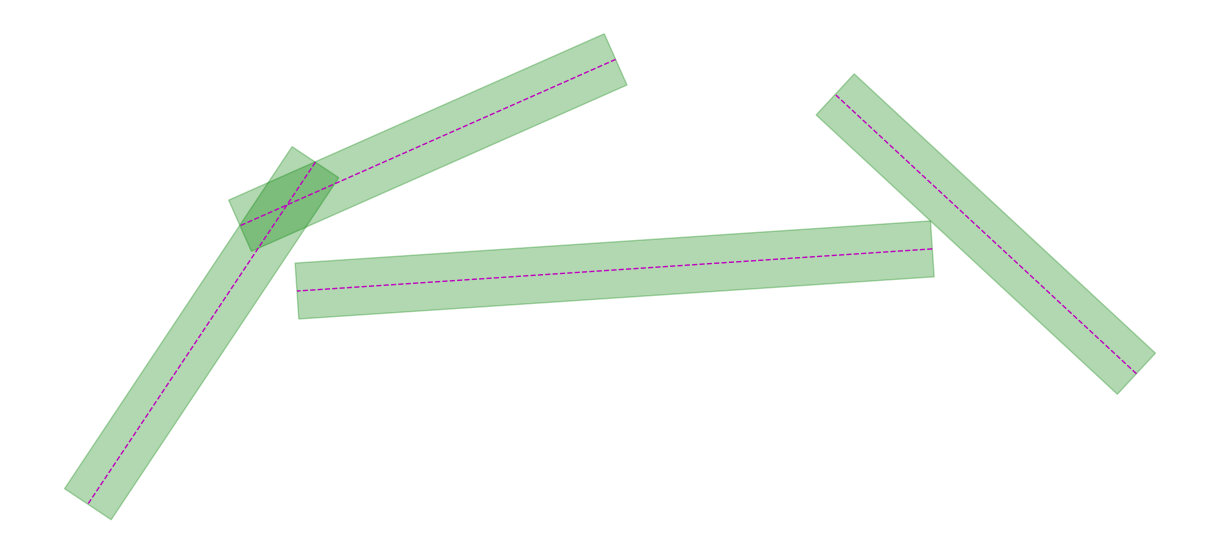

412.47384199999993
theta[0] = 26.146533
x[0] = 1.209935
y[0] = 1.942782
26.14653287398492
t=412.473842 时的最小距离: 0.0000001134


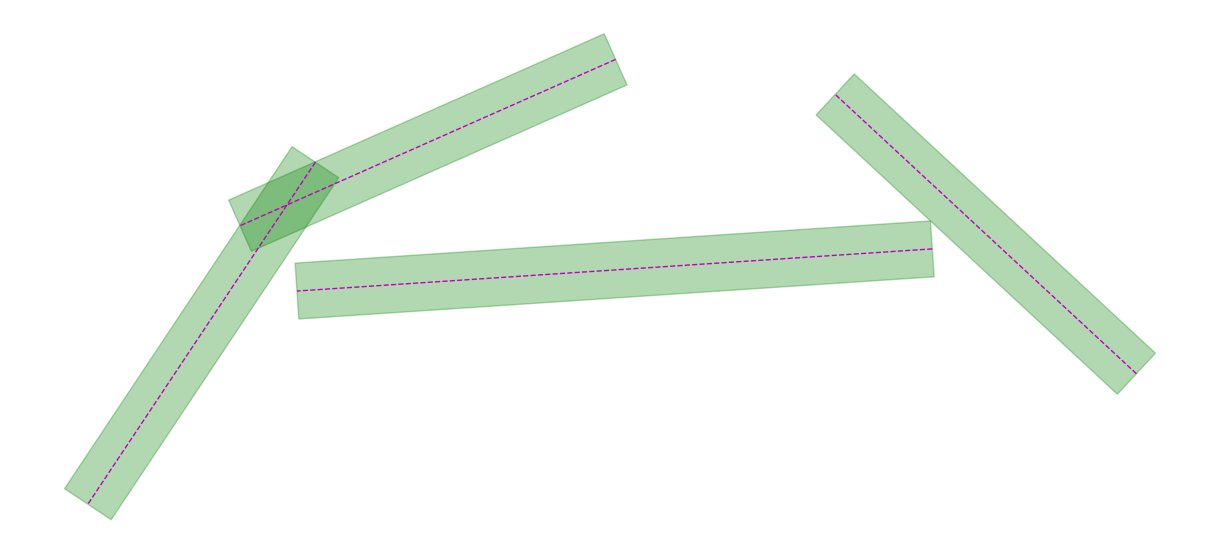

412.47384299999993
theta[0] = 26.146532
x[0] = 1.209935
y[0] = 1.942781
26.146532437382973
t=412.473843 时的最小距离: 0.0000001398


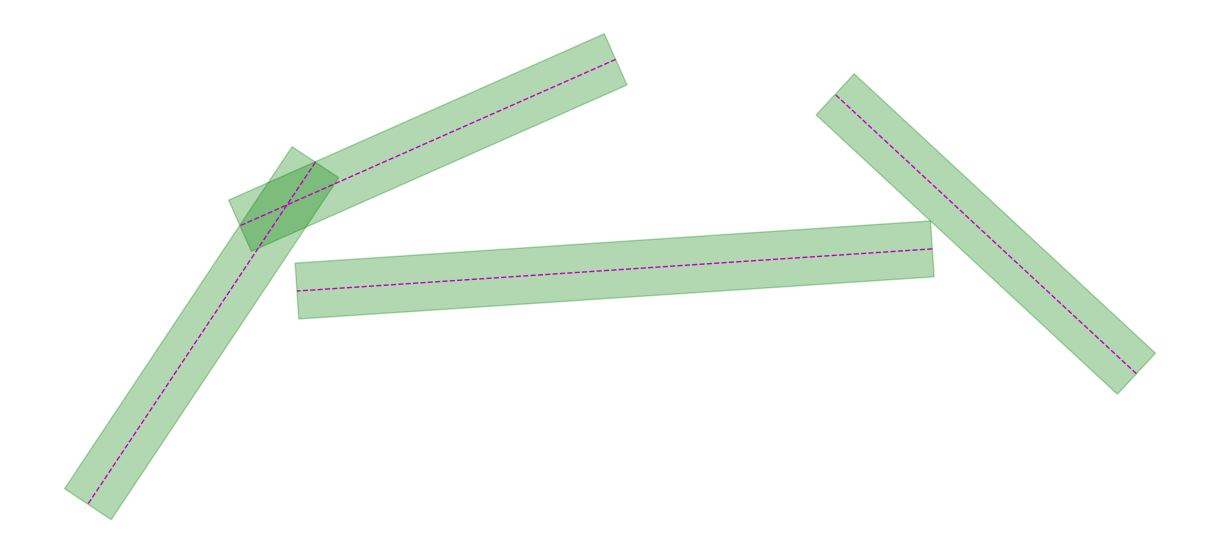

412.47384399999993
theta[0] = 26.146532
x[0] = 1.209936
y[0] = 1.942780
26.146532000781015
t=412.473844 时的最小距离: 0.0000001661


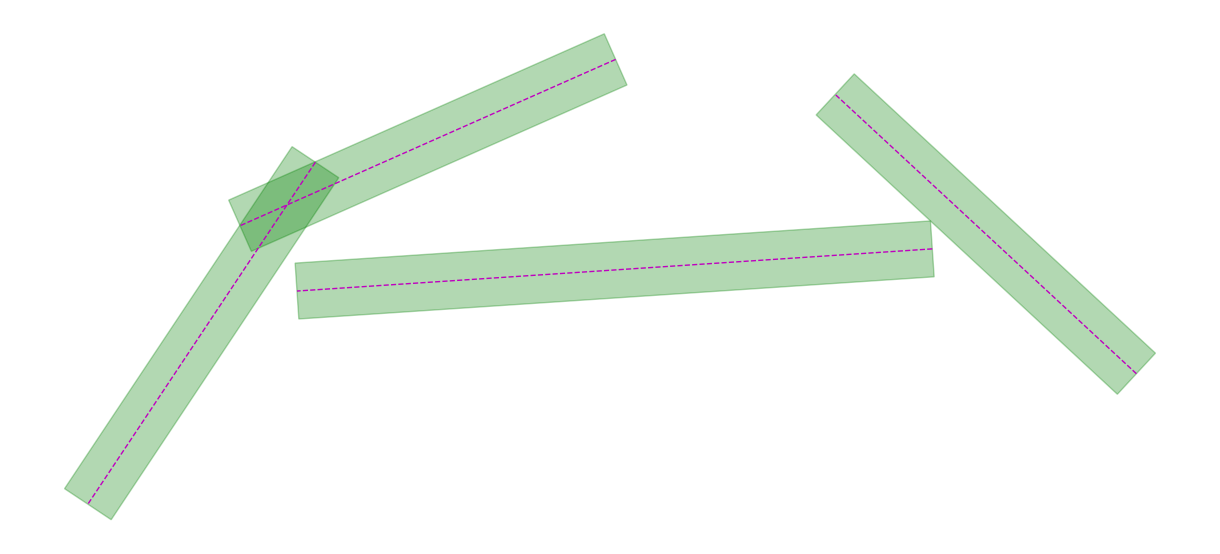

412.4738449999999
theta[0] = 26.146532
x[0] = 1.209937
y[0] = 1.942780
26.14653156417905
t=412.473845 时的最小距离: 0.0000001924


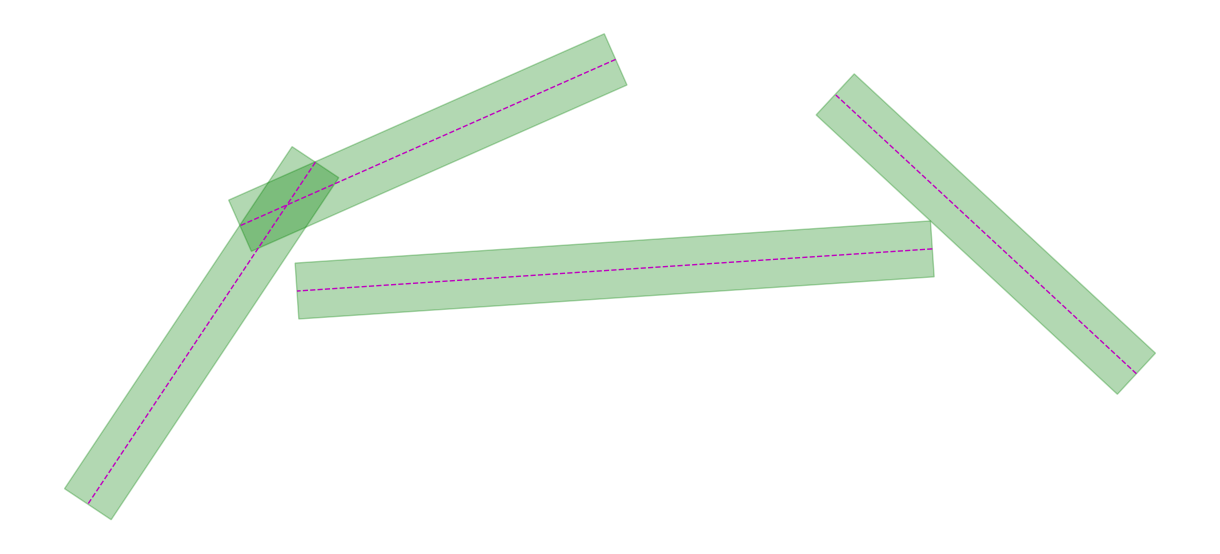

412.4738459999999
theta[0] = 26.146531
x[0] = 1.209938
y[0] = 1.942779
26.146531127577077
t=412.473846 时的最小距离: 0.0000002187


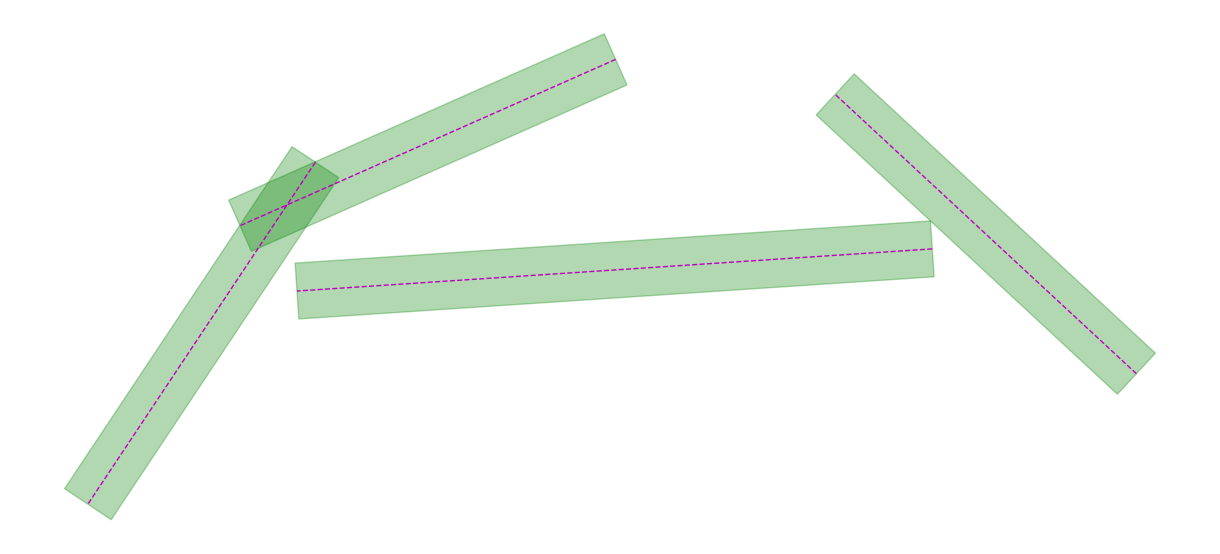

412.4738469999999
theta[0] = 26.146531
x[0] = 1.209939
y[0] = 1.942779
26.146530690975094
t=412.473847 时的最小距离: 0.0000002450


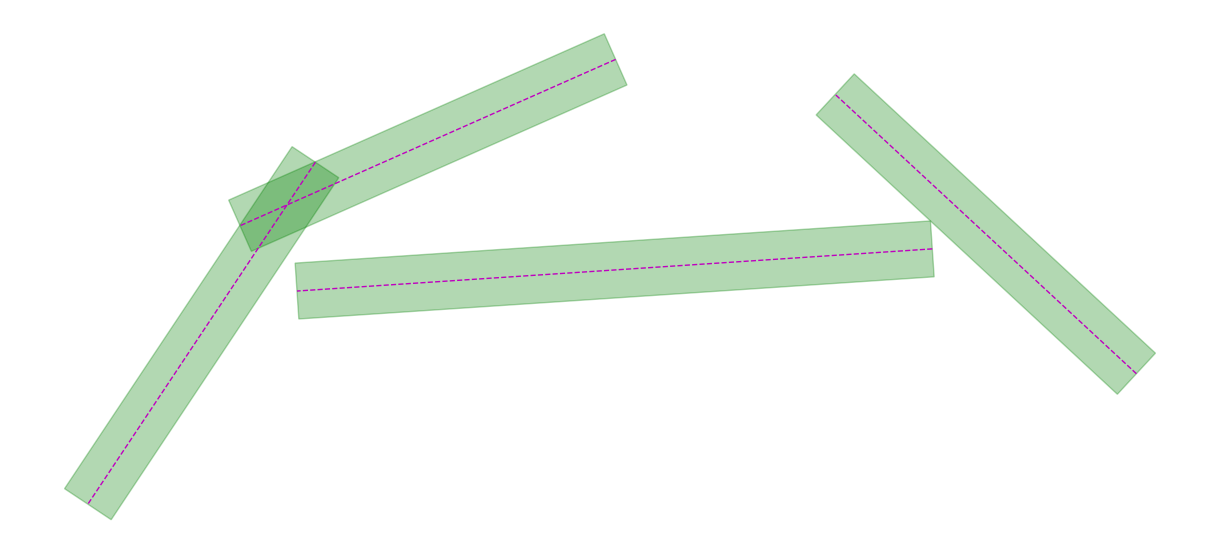

412.4738479999999
theta[0] = 26.146530
x[0] = 1.209940
y[0] = 1.942778
26.146530254373108
t=412.473848 时的最小距离: 0.0000002714


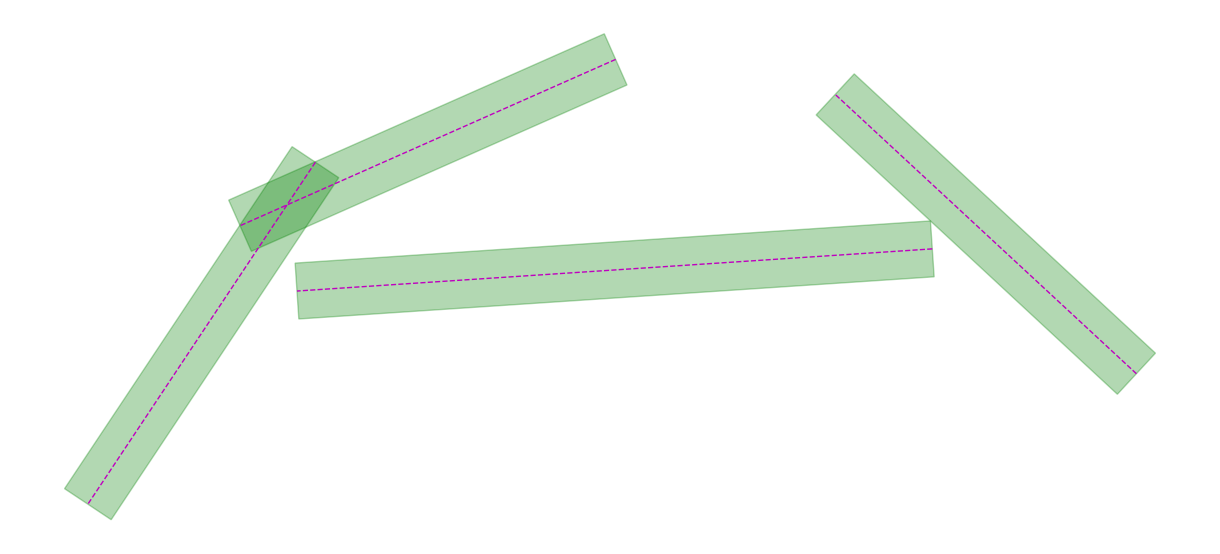

412.4738489999999
theta[0] = 26.146530
x[0] = 1.209940
y[0] = 1.942778
26.146529817771114
t=412.473849 时的最小距离: 0.0000002977


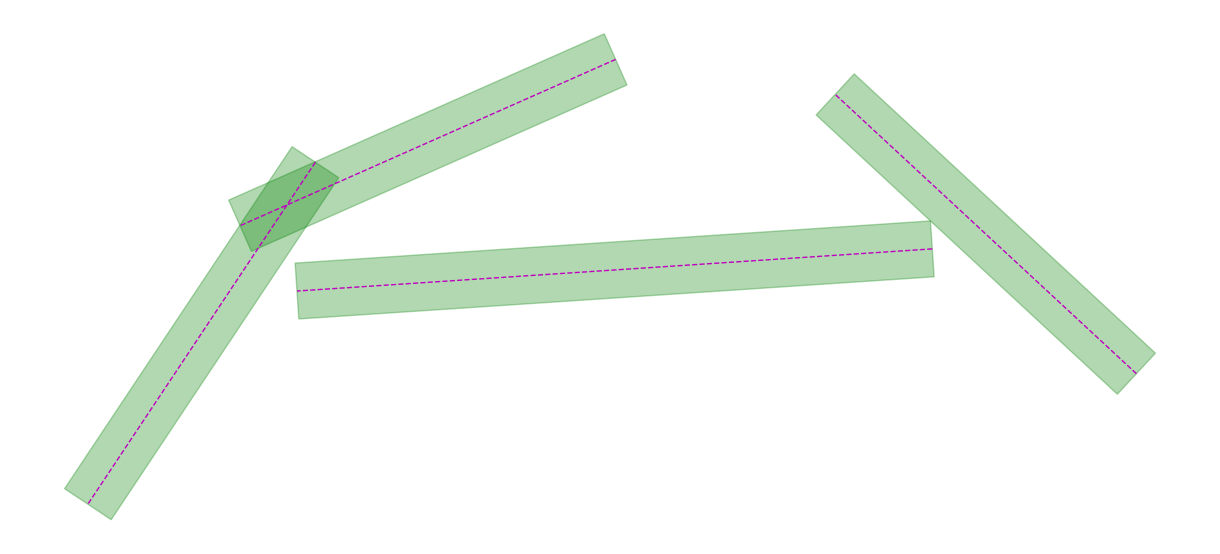

412.4738499999999
theta[0] = 26.146529
x[0] = 1.209941
y[0] = 1.942777
26.14652938116911
t=412.473850 时的最小距离: 0.0000003240


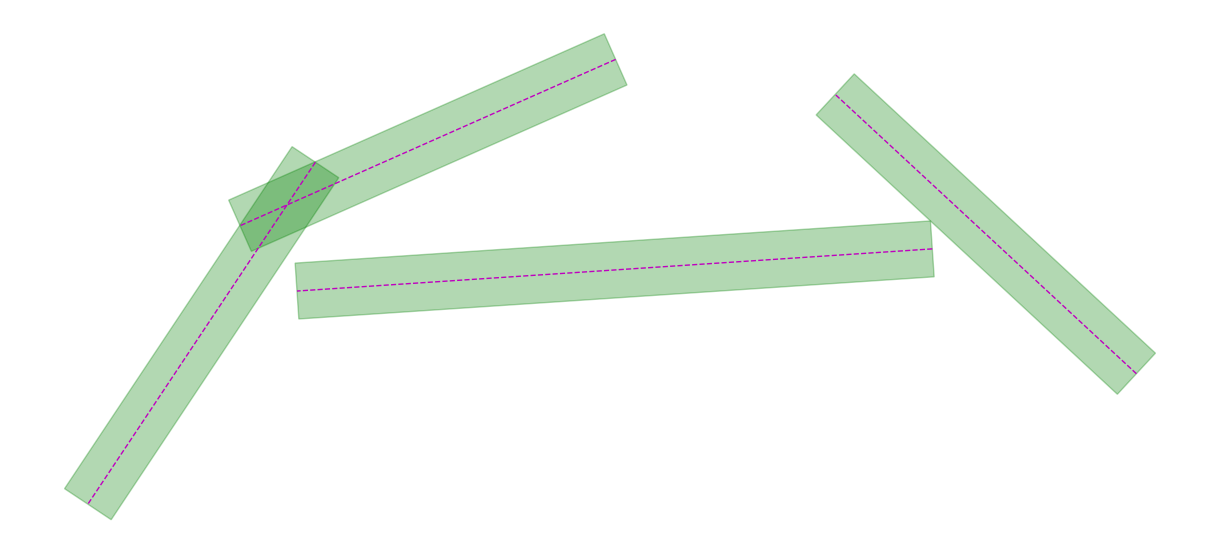

412.4738509999999
theta[0] = 26.146529
x[0] = 1.209942
y[0] = 1.942777
26.1465289445671
t=412.473851 时的最小距离: 0.0000003503


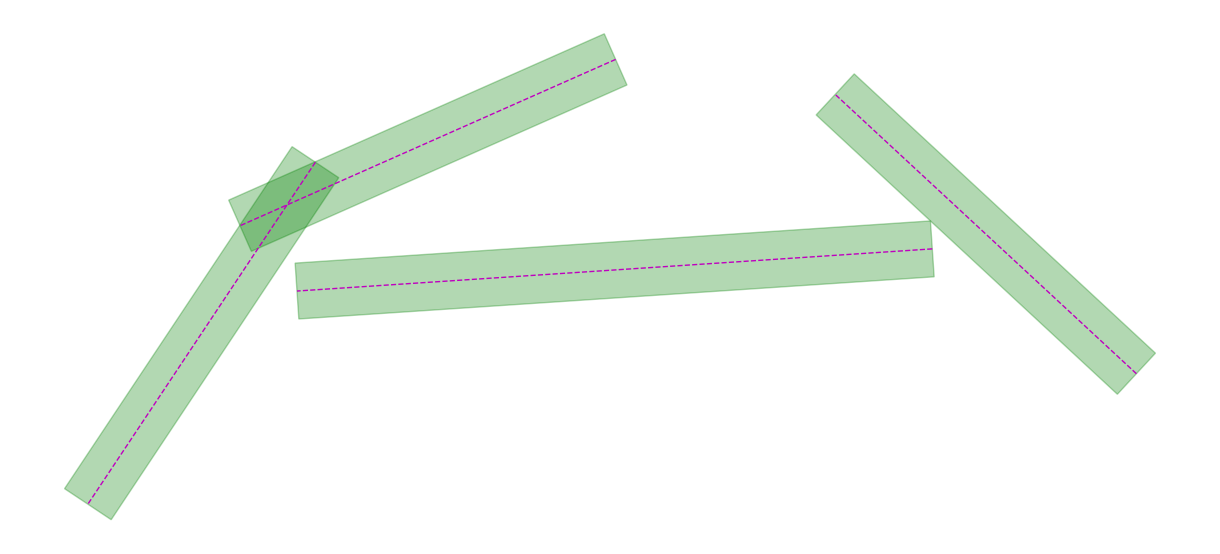

412.4738519999999
theta[0] = 26.146529
x[0] = 1.209943
y[0] = 1.942776
26.146528507965087
t=412.473852 时的最小距离: 0.0000003766


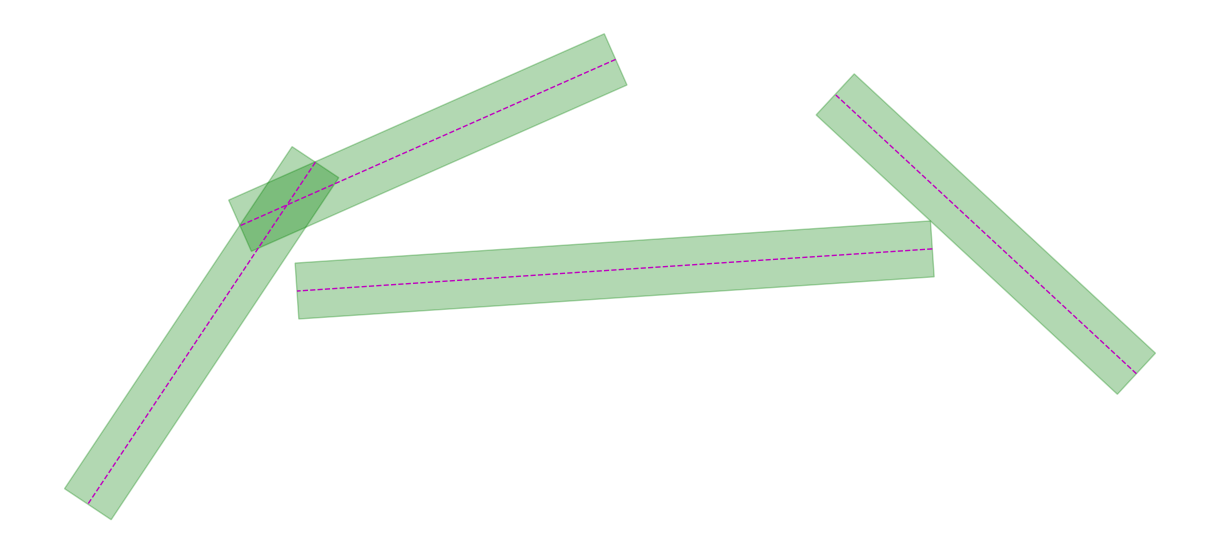

412.4738529999999
theta[0] = 26.146528
x[0] = 1.209944
y[0] = 1.942775
26.14652807136306
t=412.473853 时的最小距离: 0.0000004030


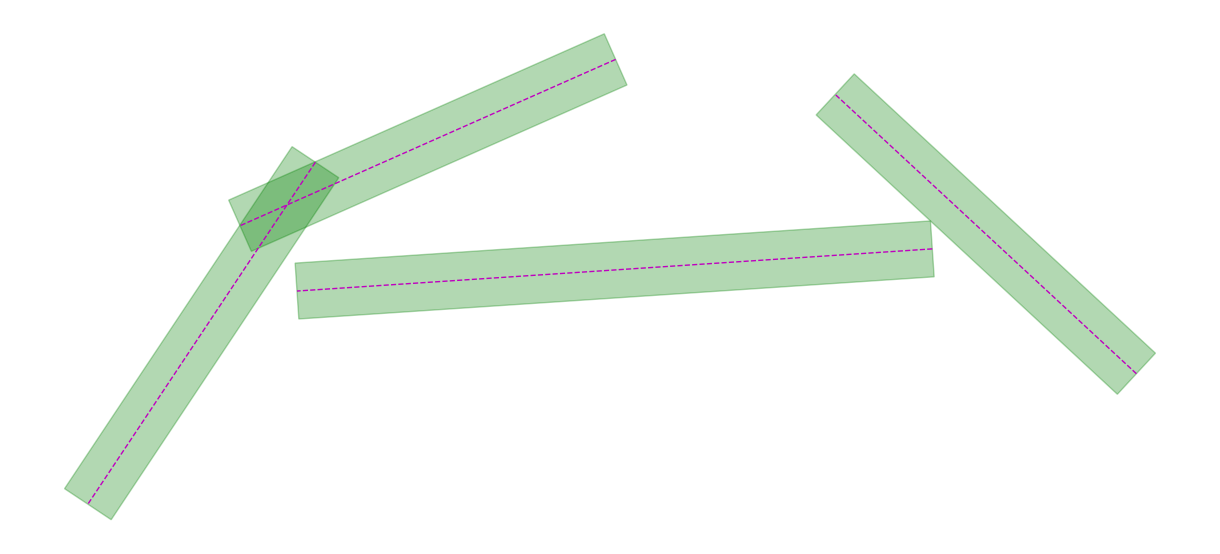

412.4738539999999
theta[0] = 26.146528
x[0] = 1.209945
y[0] = 1.942775
26.146527634761032
t=412.473854 时的最小距离: 0.0000004293


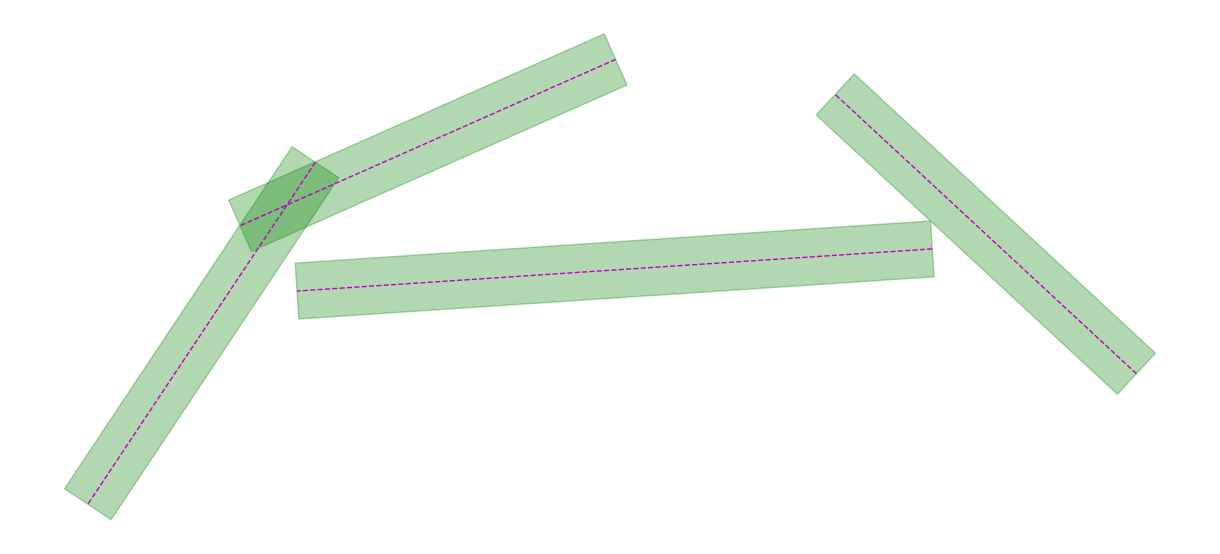

412.4738549999999
theta[0] = 26.146527
x[0] = 1.209945
y[0] = 1.942774
26.14652719815899
t=412.473855 时的最小距离: 0.0000004556


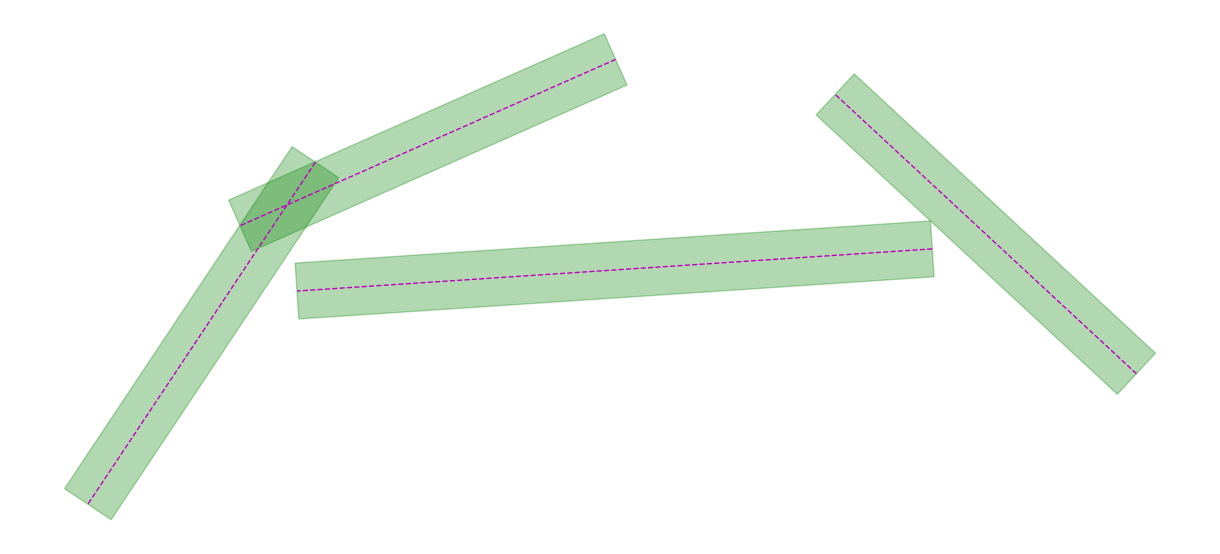

412.4738559999999
theta[0] = 26.146527
x[0] = 1.209946
y[0] = 1.942774
26.146526761556945
t=412.473856 时的最小距离: 0.0000004819


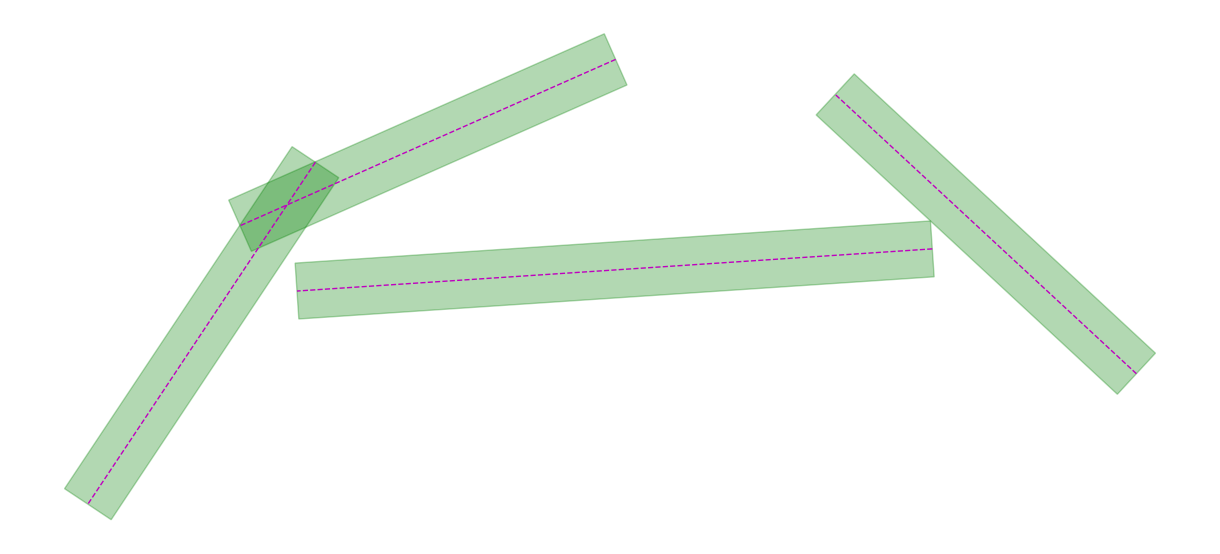

412.4738569999999
theta[0] = 26.146526
x[0] = 1.209947
y[0] = 1.942773
26.14652632495489
t=412.473857 时的最小距离: 0.0000005082


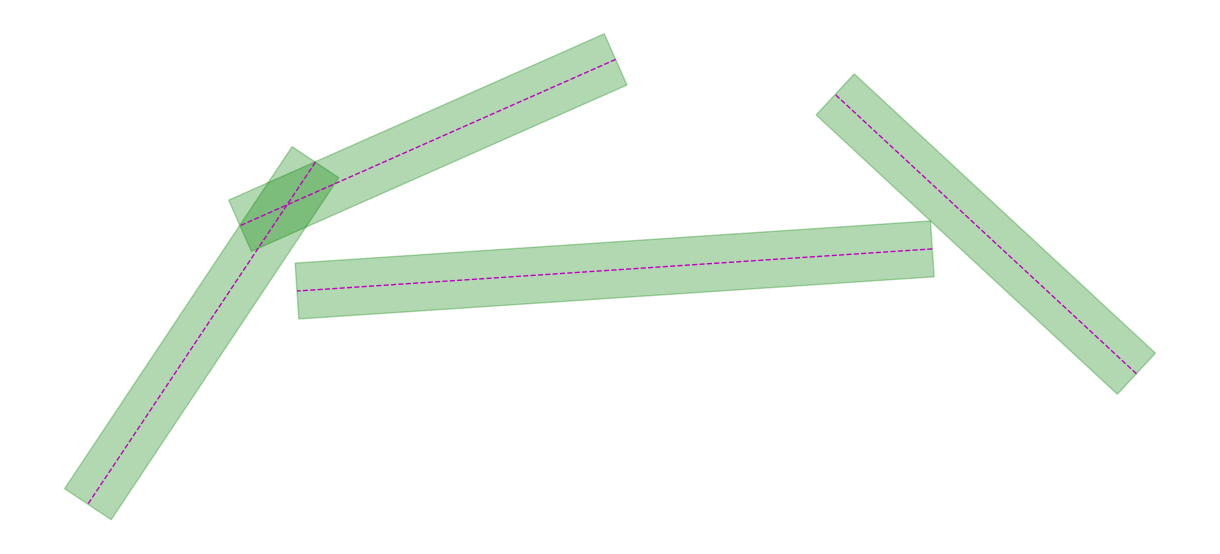

412.4738579999999
theta[0] = 26.146526
x[0] = 1.209948
y[0] = 1.942773
26.14652588835283
t=412.473858 时的最小距离: 0.0000005346


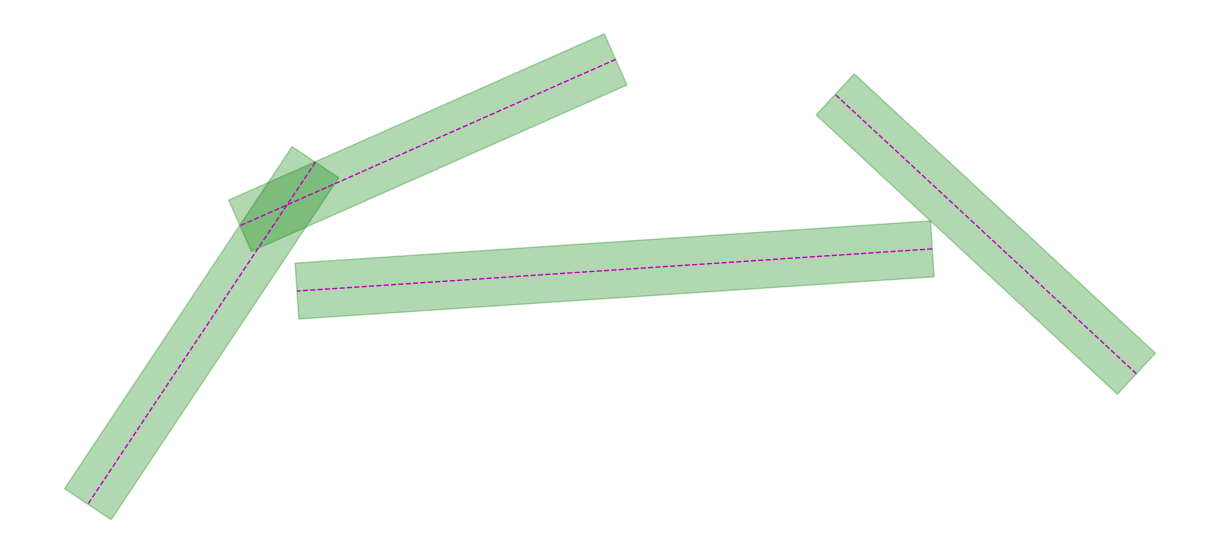

412.4738589999999
theta[0] = 26.146525
x[0] = 1.209949
y[0] = 1.942772
26.14652545175076
t=412.473859 时的最小距离: 0.0000005609


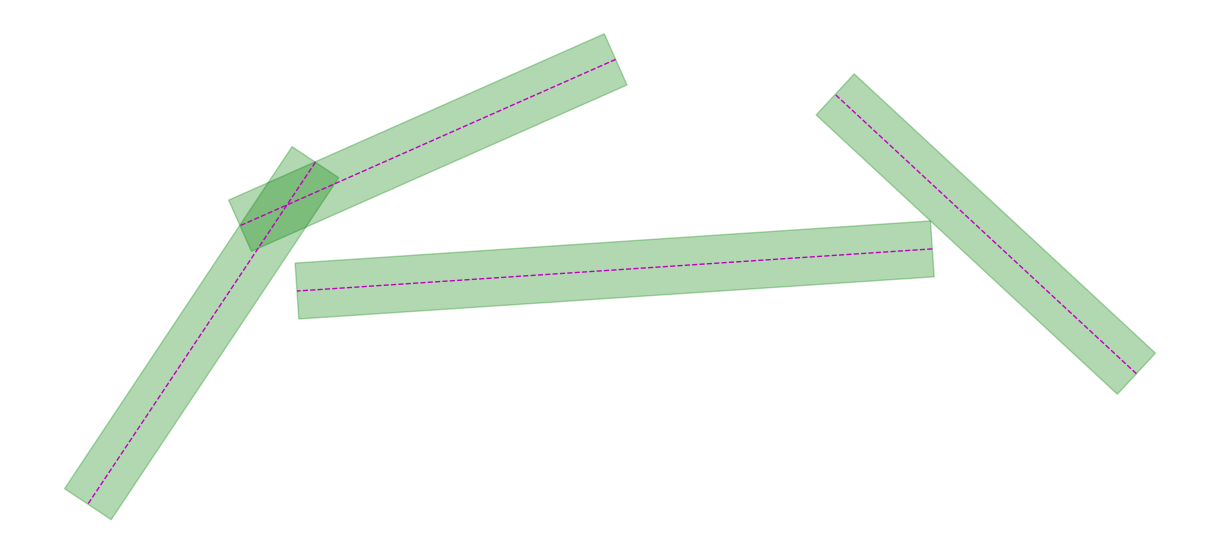

In [132]:
t_start=412.47381 #390
t_end=412.47386 #420
step=0.000001 #0.5
min_lengths=[]

for t in np.arange(t_start, t_end, step):
    print(t)
    distances=[]
    # =================================== output theta_0 ===================================
    lengther= length()
    equationer=equation(t)
    # print(equationer.dragonhead(0))
    # print(equationer.dragonhead(max_theta))

    theta_0 = brentq(equationer.dragonhead, a=0, b=max_theta, xtol=1e-8)
    print(f"theta[0] = {theta_0:.6f}")  
    x_0=lengther.k*theta_0*math.cos(theta_0)
    y_0=lengther.k*theta_0*math.sin(theta_0)
    print(f"x[0] = {x_0:.6f}")
    print(f"y[0] = {y_0:.6f}")
    theta=[]
    x=[]
    y=[]
    theta.append(theta_0)
    x.append(x_0)
    y.append(y_0)
    print(theta[0])


    # ================================== output x,y[] ===================================
    for i in range(1, 224):

        
        def recursive_equation(theta_next):
            ls2=(lengther.getr(theta[i-1]))**2+(lengther.getr(theta_next))**2-2*lengther.getr(theta[i-1])*lengther.getr(theta_next)*math.cos(theta[i-1]-theta_next)
            rs2=lengther.r0**2 if i!=1 else lengther.r1**2
            return ls2-rs2

        theta_next = brentq(recursive_equation, theta[i-1], max_theta, xtol=1e-8)

        theta.append(theta_next)
        x.append(lengther.getr(theta_next)*math.cos(theta_next))
        y.append(lengther.getr(theta_next)*math.sin(theta_next))
        if theta_next>= theta[0]+2.5*math.pi:
            break

    # ================================== plt(test1) & length(test2) ===================================
    plt.figure(figsize=(12, 10))
    ax = plt.gca()
    ax.set_aspect('equal') 
    ax.axis('off')

    for i in range(len(x)-1):

        if (theta[0]+(7*math.pi)/4 < theta[i] < theta[0]+2*math.pi or i==0 
            or theta[1]+(7*math.pi)/4 < theta[i] < theta[1]+2*math.pi ):
        
            xA, yA = x[i], y[i]
            xB, yB = x[i+1], y[i+1]
            
            dx = xB - xA
            dy = yB - yA
            segment_length = np.sqrt(dx**2 + dy**2)
            ux = dx / segment_length  
            uy = dy / segment_length  
            xA_extend = xA - ux * extend_length
            yA_extend = yA - uy * extend_length
            xB_extend = xB + ux * extend_length
            yB_extend = yB + uy * extend_length
            
            ax.plot([xA_extend, xB_extend], [yA_extend, yB_extend], 'm--', linewidth=1)
            
            vx1, vy1 = -uy, ux   
            vx2, vy2 = uy, -ux   
            p1 = (xA_extend + vertical_distance * vx1, yA_extend + vertical_distance * vy1)
            p2 = (xB_extend + vertical_distance * vx1, yB_extend + vertical_distance * vy1)
            p3 = (xB_extend + vertical_distance * vx2, yB_extend + vertical_distance * vy2)
            p4 = (xA_extend + vertical_distance * vx2, yA_extend + vertical_distance * vy2)
            # ax.plot(p4[0], p4[1], 'ro', markersize=5)
            
            rectangle = Polygon([p1, p2, p3, p4], 
                            edgecolor='green', 
                            facecolor='green', 
                            linewidth=1, 
                            alpha=0.3)
            ax.add_patch(rectangle)

            
            x1, y1 = p1
            x2, y2 = p2
            if i == 0:
                x0, y0 = p4[0], p4[1]

            else:
                distance = (abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1))/(np.sqrt((y2 - y1)** 2 + (x2 - x1)**2))
                distances.append(distance)
    
    # 计算并存储最小距离
    if distances:
        min_length = min(distances)
        min_lengths.append((t, min_length))
        print(f"t={t:.6f} 时的最小距离: {min_length:.10f}")
    else:
        min_lengths.append((t, None))
        print(f"t={t:.10f} 没有找到有效直线")

    plt.tight_layout(pad=0)
    plt.show()